# Import Data From Google Drive



In [ ]:
# We are using google colaboratory envirnoment.
# The data files are uploaded in the personal google drive.
# Here we import those files.

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15-GODO5bxsNfoFbtVzMqCaKhhx71Vi-F' -O loan.zip
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1s_rLp9syxXqXNFxxCvpb-vNUvZXoH4oF' -O Data_Dictionary.xlsx
!unzip loan.zip

--2022-01-10 17:07:17--  https://docs.google.com/uc?export=download&id=15-GODO5bxsNfoFbtVzMqCaKhhx71Vi-F
Resolving docs.google.com (docs.google.com)... 108.177.11.101, 108.177.11.113, 108.177.11.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ieg6bfn2hthvim8acukqco79d4oonfaq/1641834375000/07853932201158696572/*/15-GODO5bxsNfoFbtVzMqCaKhhx71Vi-F?e=download [following]
--2022-01-10 17:07:22--  https://doc-08-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ieg6bfn2hthvim8acukqco79d4oonfaq/1641834375000/07853932201158696572/*/15-GODO5bxsNfoFbtVzMqCaKhhx71Vi-F?e=download
Resolving doc-08-3k-docs.googleusercontent.com (doc-08-3k-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-08-3k-docs.googleusercontent.com (doc-08-3k-

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import rcParams

# Load Data in DataFrame

In [ ]:
df=pd.read_csv('loan.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data understanding

In [ ]:
# First,we check dataframe's shape and first 5 rows.
# There are 39,717 rows and 111 columns.

print(df.shape)
df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Here we rearrange the columns in alphabetical order.

df=df[sorted(df.columns)]
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,...,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,NaN,AZ,NaN,24000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/22/11 > I need to upgra...,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,5863.155187,5833.84,863.16,0.00,5000.00,NaN,https://lendingclub.com/browse/loanDetail.acti...,Verified,NaN,860xx
1,0,NaN,GA,NaN,30000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,1.11,0.0,0,0,Borrower added on 12/22/11 > I plan to use t...,1.00,NaN,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,NaN,f,NaN,NaN,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,309xx
2,0,NaN,IL,NaN,12252.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,NaN,8.72,NaN,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,NaN,f,NaN,NaN,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,3005.666844,3005.67,605.67,0.00,2400.00,NaN,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,606xx
3,0,NaN,CA,NaN,49200.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/21/11 > to pay for prop...,20.00,NaN,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,C,RENT,1076863,NaN,f,NaN,NaN,1,339.31,13.49%,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,other,n,0.00,5598,21%,C1,0.0,36 months,personel,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,12231.890000,12231.89,2214.92,16.97,10000.00,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,917xx
4,0,NaN,OR,NaN,80000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/21/11 > I plan on combi...,17.94,NaN,Jan-96,1 year,University Medical Group,3000,3000.0,B,RENT,1075358,NaN,f,NaN,NaN,0,67.79,12.69%,Dec-11,May-16,67.79,May-16,3000,Current,NaN,...,NaN,NaN,NaN,NaN,NaN,524.06,524.06,NaN,NaN,1,0,0.0,other,n,0.00,27783,53.90%,B5,0.0,60 months,Personal,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,3513.330000,3513.33,1037.39,0.00,2475.94,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,972xx


# Data Cleaning and Manipulation
We have identified a few issues with the data as mentioned below:

1.   There are a few rows and columns with null/missing values
2.   Some columns have identical values for all the rows
3.   There variables with incorrrect datatypes (eg. last_pymnt_d its string but it should be datetime)
4.   Target variables have irrelevent value (eg. loan_status = Current)
5.   Many variables are highly correlated

We address these issues in this section below.

## Drop Null Columns

In [ ]:
# In this cell, we find the percentage of null values in each column.
# Percentage helps to easily compare number of null values with respect total datapoints.
# 68 columns have at least one null value.
# 54 out of 68 columns have 100% null values (empty columns).

pd.set_option('display.max_rows', 1000)
null_cols=df.isnull().mean()*100
print(f'Number of columns with null values = {(null_cols>0).sum()}')
print(f'Number of columns with 100% null values = {(null_cols>99.99).sum()}')
print(f'Number of columns with >30% null values = {(null_cols>30).sum()}')
print()
print(null_cols[null_cols>0].sort_values())
pd.set_option('display.max_rows', 10)

Number of columns with null values = 68
Number of columns with 100% null values = 54
Number of columns with >30% null values = 58

last_credit_pull_d                  0.005036
title                               0.027696
tax_liens                           0.098195
revol_util                          0.125891
chargeoff_within_12_mths            0.140998
collections_12_mths_ex_med          0.140998
last_pymnt_d                        0.178765
pub_rec_bankruptcies                1.754916
emp_length                          2.706650
emp_title                           6.191303
desc                               32.580507
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
open_rv_12m                       100.000000
open_acc_6m                       100.000000
open_il_12m                       100.000000
num_tl_90g_dpd_24m                100.000000
num_tl_30dpd                      100.000000
num_tl_120dpd_

In [ ]:
# Based on above analysis we drop columns with more than 30% null values.
# Now we have 53 columns/variables.

columns=null_cols[null_cols>30].index
df=df.drop(columns=columns)
df.shape

(39717, 53)

In [ ]:
# In this cell, we find the percentage of null values in the remaining 10 columns.
# Because of the small number of null values in the remaining columns we can either drop or impute them.
# It can be seen that remaining 10 variables have <10% null values.
null_cols=df.isnull().mean()*100
print((null_cols>0).sum())
null_cols[null_cols>0].sort_values()

10


last_credit_pull_d            0.005036
title                         0.027696
tax_liens                     0.098195
revol_util                    0.125891
chargeoff_within_12_mths      0.140998
collections_12_mths_ex_med    0.140998
last_pymnt_d                  0.178765
pub_rec_bankruptcies          1.754916
emp_length                    2.706650
emp_title                     6.191303
dtype: float64

## Fix Missing Values
In this section, we handle remaining 10 variables For with <10% null values. We have three choices:


1.   Imputation
2.   Drop the whole column
3.   Drop the rows with null/missing values

The choice for each column is made by analyzing the number of unique values.
The reason behind these choices for each columns is given below.


In [ ]:
# Variable = last_credit_pull_d
# "May-16" is the most frequent value (frequency = 26%) but its frequency is not high enough (>50%).
# Only 0.005% rows are missing this variable.
# Hence, its best to drop rows with missing values.

print(df['last_credit_pull_d'].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[df['last_credit_pull_d'].notna()]
df.shape

May-16    25.954929
Apr-16     6.413194
Mar-16     2.827647
Feb-13     2.122624
Feb-16     1.853204
            ...    
Jul-07     0.002518
May-07     0.002518
Jul-08     0.002518
May-08     0.002518
Jun-08     0.002518
Name: last_credit_pull_d, Length: 106, dtype: float64

(39717, 53)


(39715, 53)

In [ ]:
# Variable = title
# Title is "The loan title provided by the borrower.
# It may contain useful infromation but it is is difficult to analyze.
# Hence, we drop this column.

print(df.shape)
df=df.drop(columns=['title'])
df.shape

(39715, 53)


(39715, 52)

In [ ]:
# Variable = tax_liens
# This column is dropped because all non-null rows (39,678 rows) contain same value (0.0).

print(df['tax_liens'].value_counts())
print()
print(df.shape)
df=df.drop(columns=['tax_liens'])
df.shape

0.0    39676
Name: tax_liens, dtype: int64

(39715, 52)


(39715, 51)

In [ ]:
# Variable = revol_util
# "0%" is the most frequent value (frequency = 2.5%) but its frequency is not high enough (>50%).
# Only 0.13% rows are missing this variable.
# Hence, its best to drop rows with missing values.

print(df['revol_util'].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[df['revol_util'].notna()]
df.shape

0%        2.463129
0.20%     0.158830
63%       0.156309
0.10%     0.146225
66.70%    0.146225
            ...   
23.11%    0.002521
58.77%    0.002521
8.49%     0.002521
43.61%    0.002521
11.63%    0.002521
Name: revol_util, Length: 1089, dtype: float64

(39715, 51)


(39665, 51)

In [ ]:
# Variable = collections_12_mths_ex_med
# This column is dropped because all non-null rows (39,609 rows) contain same value (0.0).

print(df['collections_12_mths_ex_med'].value_counts())
print()
print(df.shape)
df=df.drop(columns=['collections_12_mths_ex_med'])
df.shape

0.0    39609
Name: collections_12_mths_ex_med, dtype: int64

(39665, 51)


(39665, 50)

In [ ]:
# Variable = chargeoff_within_12_mths
# This column is dropped because all non-null rows (39,609 rows) contain same value (0.0).

print(df['chargeoff_within_12_mths'].value_counts())
print()
print(df.shape)
df=df.drop(columns=['chargeoff_within_12_mths'])
df.shape

0.0    39609
Name: chargeoff_within_12_mths, dtype: int64

(39665, 50)


(39665, 49)

In [ ]:
# Variable = last_pymnt_d
# "May-16" is the most frequent value (frequency = 3.17%) but its frequency is not high enough (>50%).
# Only 0.18% rows are missing this variable.
# Hence, its best to drop rows with missing values.

print(df['last_pymnt_d'].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[df['last_pymnt_d'].notna()]
df.shape

May-16    3.171877
Mar-13    2.585989
Dec-14    2.383959
May-13    2.290520
Feb-13    2.192030
            ...   
Jun-08    0.025254
Nov-08    0.025254
Mar-08    0.012627
Jan-08    0.010102
Feb-08    0.002525
Name: last_pymnt_d, Length: 101, dtype: float64

(39665, 49)


(39598, 49)

In [ ]:
# Variable = pub_rec_bankruptcies
# "0.0" is the most frequent value (frequency = 95.7%) and its frequency is  high enough (>50%).
# This is a categorical variable.
# Hence, its missing values are imputed with the mode.

print(df['pub_rec_bankruptcies'].value_counts(normalize=True)*100)
print()
mode=df['pub_rec_bankruptcies'].mode()[0]
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(mode)
df['pub_rec_bankruptcies'].value_counts(normalize=True)*100

0.0    95.696879
1.0     4.285127
2.0     0.017994
Name: pub_rec_bankruptcies, dtype: float64



0.0    95.772514
1.0     4.209809
2.0     0.017678
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
# Variable = emp_length
# "10+ years" is the most frequent value (frequency = 23%) but its frequency is not high enough (>50%).
# Only 2.71% rows are missing this variable.
# Hence, its best to drop rows with missing values.

print(df['emp_length'].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[df['emp_length'].notna()]
df.shape

10+ years    23.017830
< 1 year     11.842413
2 years      11.359684
3 years      10.599258
4 years       8.881161
               ...    
1 year        8.369884
6 years       5.774571
7 years       4.591108
8 years       3.825491
9 years       3.257118
Name: emp_length, Length: 11, dtype: float64

(39598, 49)


(38531, 49)

In [ ]:
# Variable = emp_title
# Its description says "The job title supplied by the Borrower when applying for the loan.*"
# This variable is little bit complicated to analyze because it contains long sentences.
# It does not have specific structure.
# Hence, we drop this column.

print(df.shape)
df=df.drop(columns=['emp_title'])
df.shape

(38531, 49)


(38531, 48)

## Drop Unnecessary Columns

In [ ]:
# Columns such as 'id','member_id','url','zip_code' do not contain useful information .
# Hence, we drop these columns.

print(df.shape)
df=df.drop(columns=['id','member_id','url','zip_code'])
df.shape

(38531, 48)


(38531, 44)

## Remove Identical Columns

In [ ]:
# In this cell, we find columns having identical values in all rows.
# As identical value do help in any way we drop these columns.

nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
print('Columns with identical values in all rows = {cols_to_drop}')
print()
print(df.shape)
df=df.drop(columns=cols_to_drop)
df.shape

Columns with identical values in all rows = {cols_to_drop}

(38531, 44)


(38531, 38)

In [ ]:
# 97% values in columns'out_prncp' and 'out_prncp_inv' are same (0.00).
# Hence, we drop these columns.

print(df[['out_prncp','out_prncp_inv']].value_counts(normalize=True)*100)
print()
print(df.shape)
df=df.drop(columns=['out_prncp','out_prncp_inv'])
df.shape

out_prncp  out_prncp_inv
0.00       0.00             97.150346
1972.60    1972.60           0.005191
942.36     942.36            0.002595
911.80     911.80            0.002595
913.71     913.71            0.002595
                              ...    
2161.12    2161.12           0.002595
2158.43    2158.43           0.002595
2148.80    2145.16           0.002595
2147.25    2147.25           0.002595
1545.26    1545.26           0.002595
Length: 1098, dtype: float64

(38531, 38)


(38531, 36)

## Filter Data

In [ ]:
# In this anlaysis, we are only interested in customers who have either fully paid their loan or defaulted.
# Hence, we drop customers who are currently paying installments.

print(df.shape)
df=df[~(df['loan_status']=='Current')]
df.shape

(38531, 36)


(37433, 36)

## Fix Incorrect Data Types

In [ ]:
# Check datatypes

pd.set_option('display.max_rows', 100)
print(df.dtypes)
pd.set_option('display.max_rows', 10)

addr_state                  object
annual_inc                 float64
collection_recovery_fee    float64
delinq_2yrs                  int64
dti                        float64
earliest_cr_line            object
emp_length                  object
funded_amnt                  int64
funded_amnt_inv            float64
grade                       object
home_ownership              object
inq_last_6mths               int64
installment                float64
int_rate                    object
issue_d                     object
last_credit_pull_d          object
last_pymnt_amnt            float64
last_pymnt_d                object
loan_amnt                    int64
loan_status                 object
open_acc                     int64
pub_rec                      int64
pub_rec_bankruptcies       float64
purpose                     object
recoveries                 float64
revol_bal                    int64
revol_util                  object
sub_grade                   object
term                

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
# int_rate is the "Interest Rate on the loan".
# It contains "%" symbol which should be removed.
# And needs to be converted to float.

df['int_rate']=df['int_rate'].apply(lambda x:float(x.replace('%','')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# revol_util is the "Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.	"
# It contains "%" symbol which should be removed.
# And needs to be converted to float.

df['revol_util']=df['revol_util'].apply(lambda x:float(x.replace('%','')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# These variables contain date information: issue_d, last_credit_pull_d, last_pymnt_d, earliest_cr_line
# Hence, need to be converted to datetime variable.

df['issue_d']=df['issue_d'].apply(lambda x:datetime.strptime(x,"%b-%y"))
df['last_credit_pull_d']=df['last_credit_pull_d'].apply(lambda x:datetime.strptime(x,"%b-%y"))
df['last_pymnt_d']=df['last_pymnt_d'].apply(lambda x:datetime.strptime(x,"%b-%y")) 
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda x:datetime.strptime(x,"%b-%y"))

In [ ]:
# Check datatypes again.
# It can be seen that datatypes of variable are now appropriate.

pd.set_option('display.max_rows', 100)
print(df.dtypes)
pd.set_option('display.max_rows', 10)

addr_state                         object
annual_inc                        float64
collection_recovery_fee           float64
delinq_2yrs                         int64
dti                               float64
earliest_cr_line           datetime64[ns]
emp_length                         object
funded_amnt                         int64
funded_amnt_inv                   float64
grade                              object
home_ownership                     object
inq_last_6mths                      int64
installment                       float64
int_rate                          float64
issue_d                    datetime64[ns]
last_credit_pull_d         datetime64[ns]
last_pymnt_amnt                   float64
last_pymnt_d               datetime64[ns]
loan_amnt                           int64
loan_status                        object
open_acc                            int64
pub_rec                             int64
pub_rec_bankruptcies              float64
purpose                           

## Remove Highly Correlated Variables

In [ ]:
# We still have 36 variable in our dataset, which are quite large for the analysis.
# Here, we remove the variable which are highly correlated (correlation > 0.7).
# The correlated variables contain similar information, there analysis is doesn't provide more information.
# We use corr() method find correlation matrix and plot it as shown below.

corr = df.corr().iloc[:,:]
corr.style.background_gradient(cmap='coolwarm')

,annual_inc,collection_recovery_fee,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
annual_inc,1.000000,0.016222,0.021388,-0.123811,0.261716,0.249018,0.036237,0.264435,0.046912,0.140994,0.266033,0.154041,-0.014424,-0.012159,0.022401,0.276400,0.014873,0.233087,0.252879,0.241921,0.182367,0.006303,0.253371
collection_recovery_fee,0.016222,1.000000,0.013870,0.010767,0.078250,0.064097,0.011791,0.077021,0.069760,-0.043031,0.076561,0.006577,-0.007044,-0.007232,0.798521,0.022947,0.027069,0.011471,0.029248,0.019327,0.042550,0.095560,-0.057708
delinq_2yrs,0.021388,0.013870,1.000000,-0.034462,-0.033653,-0.039930,0.007897,-0.021533,0.158392,-0.013276,-0.033552,0.010848,0.009689,0.004557,0.012179,-0.054926,-0.042903,0.066252,-0.024432,-0.030930,0.022685,0.029085,-0.039715
dti,-0.123811,0.010767,-0.034462,1.000000,0.060870,0.069597,0.000137,0.050434,0.113291,0.008819,0.061004,0.289045,-0.004862,0.007789,0.025321,0.227346,0.279089,0.229293,0.058207,0.065457,0.102600,-0.011922,0.035607
funded_amnt,0.261716,0.078250,-0.033653,0.060870,1.000000,0.955504,0.012633,0.957643,0.304790,0.477732,0.981541,0.171248,-0.046665,-0.031639,0.143366,0.305597,0.066817,0.248667,0.899991,0.865098,0.736489,0.049375,0.865473
funded_amnt_inv,0.249018,0.064097,-0.039930,0.069597,0.955504,1.000000,-0.002958,0.904212,0.297882,0.468143,0.936988,0.158184,-0.048180,-0.032540,0.131350,0.285099,0.072180,0.241028,0.874872,0.910091,0.725932,0.028922,0.838723
inq_last_6mths,0.036237,0.011791,0.007897,0.000137,0.012633,-0.002958,1.000000,0.010859,0.132401,0.028447,0.012632,0.094369,0.023482,0.013517,0.017856,-0.021167,-0.070571,0.114442,-0.007502,-0.017974,0.026813,0.030900,-0.020410
installment,0.264435,0.077021,-0.021533,0.050434,0.957643,0.904212,0.010859,1.000000,0.276461,0.412236,0.931524,0.168535,-0.041914,-0.028766,0.121227,0.308728,0.092399,0.228089,0.859260,0.817605,0.641403,0.057875,0.848956
int_rate,0.046912,0.069760,0.158392,0.113291,0.304790,0.297882,0.132401,0.276461,1.000000,0.175466,0.301088,0.009450,0.098889,0.083667,0.129244,0.096634,0.466511,-0.043584,0.292299,0.286647,0.523394,0.094909,0.175643
last_pymnt_amnt,0.140994,-0.043031,-0.013276,0.008819,0.477732,0.468143,0.028447,0.412236,0.175466,1.000000,0.473692,0.078978,-0.032866,-0.021750,-0.072050,0.124473,-0.016231,0.164769,0.509523,0.497993,0.240248,-0.063006,0.565769


In [ ]:
# Highly correlated variables contain similar information.
# There are lot of variables in this dataset.
# Hence, we drop these highly correlated variables (correlation > 0.7).
# We keep only one feature that are easy to understant from the correlated tuples.

cols_to_drop=['funded_amnt','funded_amnt_inv','installment','collection_recovery_fee','total_pymnt_inv','total_rec_int','total_rec_prncp','open_acc']
print(df.shape)
df=df.drop(columns=cols_to_drop)
df.shape

(37433, 36)


(37433, 28)

Finally, we have 28 variables.

## Derived Metrics

Here we create new metrics from issue_d and last_pymnt_d. We extract month and year from these variables.

In [ ]:
df['issue_month']=df['issue_d'].apply(lambda x:x.month)
df['issue_year']=df['issue_d'].apply(lambda x:x.year)
df['last_pymnt_month']=df['last_pymnt_d'].apply(lambda x:x.month)
df['last_pymnt_year']=df['last_pymnt_d'].apply(lambda x:x.year)

# Classify Variables into Categorical and Continuous Variables
The process of EDA is different for categorical and continuous variable. Therefore, it is good idea to separate variable into appropriate category.



## Categorical Variables
We use following criterion for categorical variable:

*   Variable is of type object
*   If variable is numeric type and number of unique values are less 50



In [ ]:
# First, we find variables of type object.

df.select_dtypes(include=['object']).columns

Index(['addr_state', 'emp_length', 'grade', 'home_ownership', 'loan_status',
       'purpose', 'sub_grade', 'term', 'verification_status'],
      dtype='object')

In [ ]:
# Here, we find variables which small number of unique values.

pd.set_option('display.max_rows', 100)
print(df.nunique().sort_values())
pd.set_option('display.max_rows', 10)

loan_status                 2
term                        2
verification_status         3
pub_rec_bankruptcies        3
issue_year                  5
pub_rec                     5
home_ownership              5
grade                       7
last_pymnt_year             9
inq_last_6mths              9
delinq_2yrs                11
emp_length                 11
issue_month                12
last_pymnt_month           12
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
total_acc                  82
last_pymnt_d              101
last_credit_pull_d        106
int_rate                  370
earliest_cr_line          514
loan_amnt                 865
revol_util               1086
total_rec_late_fee       1294
dti                      2848
recoveries               3851
annual_inc               4997
revol_bal               20986
last_pymnt_amnt         33627
total_pymnt             35703
dtype: int64


In [ ]:
# below is the list containing 13 categorical variables based on above criterion.

cat_vars=['addr_state', 'emp_length', 'grade', 'home_ownership', 'loan_status',
          'purpose', 'sub_grade', 'term', 'verification_status',
          'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies']
len(cat_vars)

13

## Continuous Variables

The remaining variables of type int and float are continuous variables.

In [ ]:
# below is the list containing 11 continuous variables.

num_vars=['annual_inc', 'dti', 'int_rate', 'last_pymnt_amnt', 'loan_amnt',
           'recoveries', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_late_fee']
len(num_vars)

11

# Univariate Analysis

In this section, we perform univariate analysis on categorical and continuous variables. Here, we briefly decribe the protocol of univariate analysis:


*   Protocol for categorical variables: We plot the distribution of categorical variable as histogram. We have used percentage of data points instead of counts/frequency as percentages are easy to comprehend. 
*   Protocol for categorical variables: We compute different metrics (eg. mean, 25th quantile, 50th quantile, etc.). We also plot box plot and distribution using frequency histogram.



## Categorical Variables

In [ ]:
cat_vars

['addr_state',
 'emp_length',
 'grade',
 'home_ownership',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies']

In [ ]:
# In this cell, we have defined a function to plot distribution of categorical variable in terms of percentage.

def plotUniDist(df,col,figsize=(13,5),title=None):
  plt.figure(figsize=figsize)
  (df[col].value_counts(normalize=True)*100).plot.bar()
  if title is None:
    plt.title(col)
  else:
    plt.title(title)
  plt.ylabel('Percent')
  plt.show()

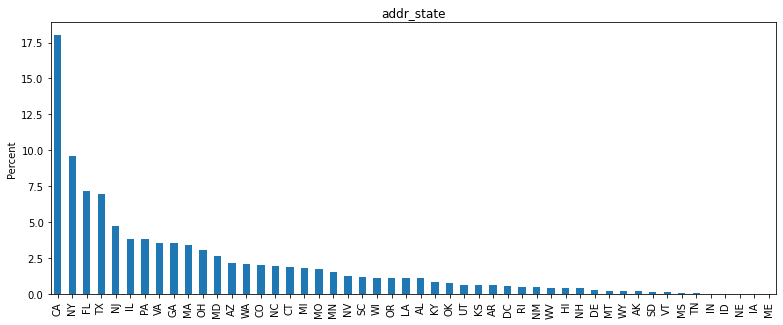

In [ ]:
# Variable = addr_state
# It is the state provided by the borrower in the loan application.
# It can be seen that the borrowers are from USA.
# Distribution below shows most of the borrowers are from \
# California, New York, Florida, Texas, New Jersey, Illinois. 
# These are some of the most populated states in USA.

col='addr_state'
plotUniDist(df,col,figsize=(13,5))

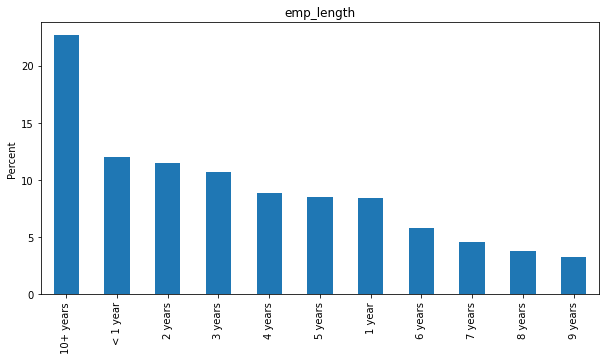

In [ ]:
# Variable = emp_length
# It is the borrower's Employment length in years.
# Distribution below, we can see that most of the borrowers have more than 10 years of employment.
# Followed by less 1 year of employment.
# The number of borrower decrease systematical from 2 year to 9 years.
# From this data, it looks like people in their early or late career apply for loans.

col='emp_length'
plotUniDist(df,col,figsize=(10,5))

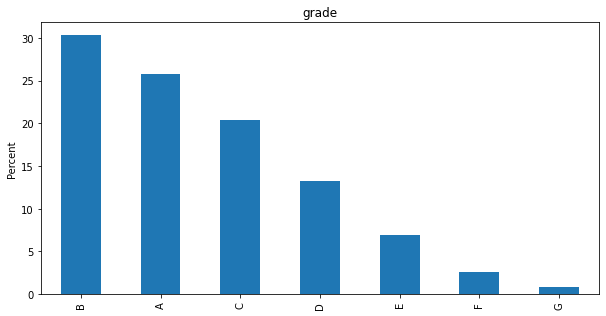

In [ ]:
# Variable = emp_length
# It is the LC assigned loan grade.
# LC is the Loan grading is a classification system that involves \
# assigning a quality score to a loan based on a borrower's credit history, \
# quality of the collateral, and the likelihood of repayment of the principal and interest.
# It can be seen that most borrowers have B grade.

col='grade'
plotUniDist(df,col,figsize=(10,5))

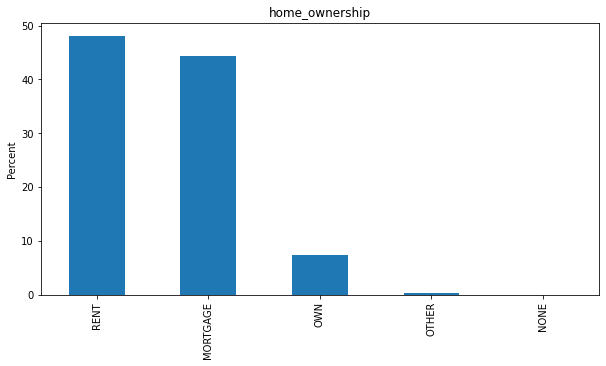

In [ ]:
# Variable = home_ownership
# It is The home ownership status provided by the borrower during registration.
# It can be seen that most borrowers have either live in rented home or \
# have mortgage on their home.

col='home_ownership'
plotUniDist(df,col,figsize=(10,5))

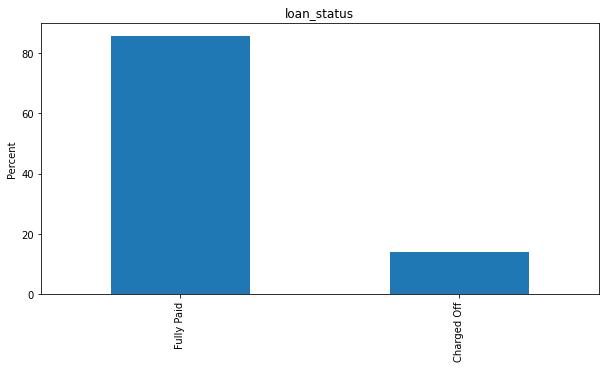

In [ ]:
# Variable = loan_status
# This is the targe variable showing current status of the loan.
# Fully Paid: borrower have fully paid their loan principal+interest
# Charged Off: borrower have defaulted.
# In this study, we have to identify driver variables for loan status. 
# It can be seen that more than 80% borrowers have full paid their loan \
# and <20% borrower have defaulted.

col='loan_status'
plotUniDist(df,col,figsize=(10,5))

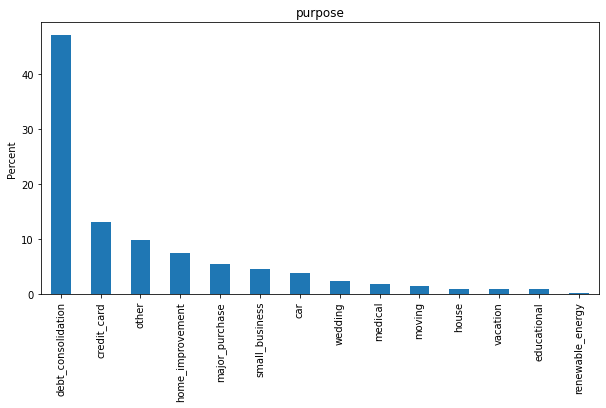

In [ ]:
# Variabl = purpose
# It is a category provided by the borrower for the loan request.
# It tell borrow's intention for loan application.
# It can be seen that more than 40% borrower are applying for loan consolidation.
# Loan consolidation means: a loan made in order to consolidate several debts into one loan, \
# usually for the purpose of reducing the monthly payments by extending them over a longer time period.

col='purpose'
plotUniDist(df,col,figsize=(10,5))

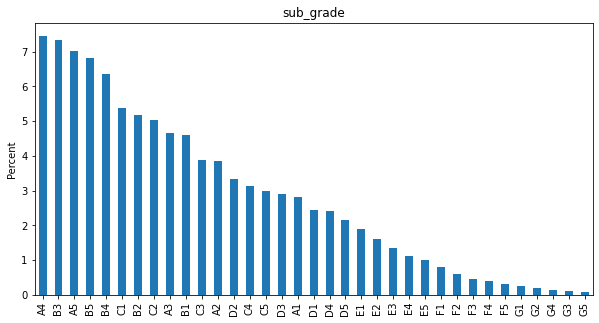

In [ ]:
# Variable = sub_grade
# It is the LC assigned loan subgrade.
# It can be seen that most borrower have A4 sub-grad.

col='sub_grade'
plotUniDist(df,col,figsize=(10,5))

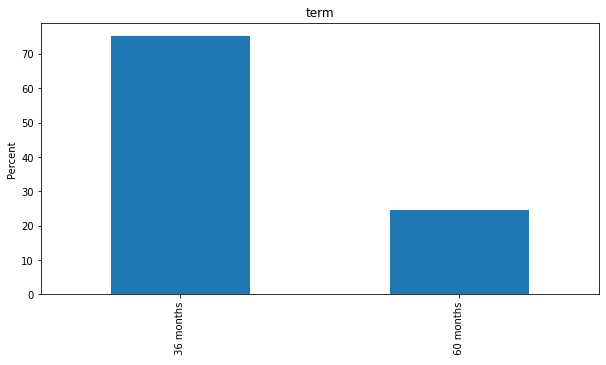

In [ ]:
# Variable = term
# It is period of loan in months
# It can be seen that most borrowers have applied for short term loan (3 years) \
# over longer term loan (5 year)

col='term'
plotUniDist(df,col,figsize=(10,5))

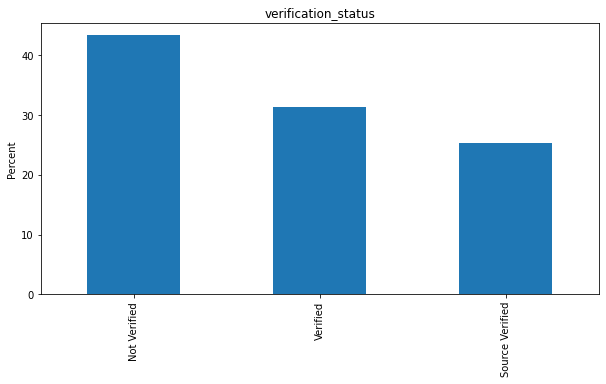

In [ ]:
# Variable = verification_status
# Indicates if income was verified by LC, not verified, or if the income source was verified.
# It can be seen that most borrower's income has not been verified maybe because of \
# lack of information or time and efforts involved.
# Income source has been verified for <30% of the borrowers.

col="verification_status"
plotUniDist(df,col,figsize=(10,5))

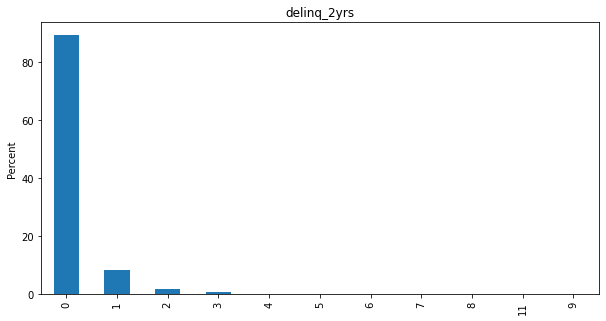

In [ ]:
# Verification = delinq_2yrs
# It is the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
# Delinquency means there has been delay in the installment.
# It can be seen that most of the borrower paid their installments on time.

col='delinq_2yrs'
plotUniDist(df,col,figsize=(10,5))

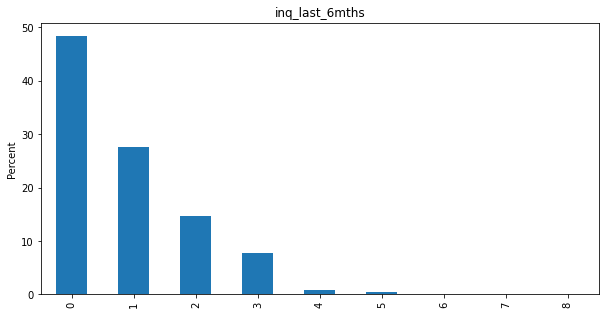

In [ ]:
# Variable = inq_last_6mths
# It is the number of inquiries made by borrowers in past 6 months (excluding auto and mortgage inquiries)
# Distribution below shows systematic decrease in the percentage of borrower making inquiry

col='inq_last_6mths'
plotUniDist(df,col,figsize=(10,5))

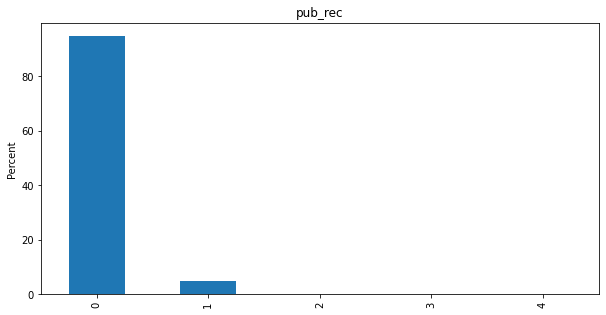

In [ ]:
# Variable = pub_rec
# It is the number of derogatory public records against borrower.
# It can be seen that most of the borrowers (>80%) have no derogatory public records against them.

col='pub_rec'
plotUniDist(df,col,figsize=(10,5))

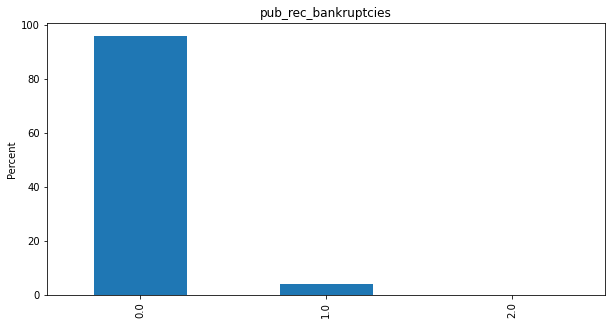

In [ ]:
# Variable = pub_rec_bankruptcies
# It is the number of public record bankruptcies filed by borrowers.
# It can be seen that most of the borrowers (>80%) have no public records of bankruptcies against them.

col = 'pub_rec_bankruptcies'
plotUniDist(df,col,figsize=(10,5))

## Continuous Variables

In [ ]:
num_vars

['annual_inc',
 'dti',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'recoveries',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_rec_late_fee']

In [ ]:
# In this cell, we have defined a function to plot the box plot and distribution of continuous variable in terms of percentage
# This function also calculates different metric of the data (eg. mean, min, max, 25th quantitle, etc)

def plotUniBoxHistPlot(df,col,bins=20,title=None):
  print(df[col].describe())
  print()
  fig, axes = plt.subplots(nrows=1, ncols=2,sharey=False,sharex=False,figsize=(13,5))
  df[col].plot.box(ax=axes[0])
  df[col].plot.hist(bins=bins,ax=axes[1])
  if title is None:
    fig.suptitle(col)
  else:
    fig.suptitle(title)
  plt.show()

count    3.743300e+04
mean     6.946732e+04
std      6.471331e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64



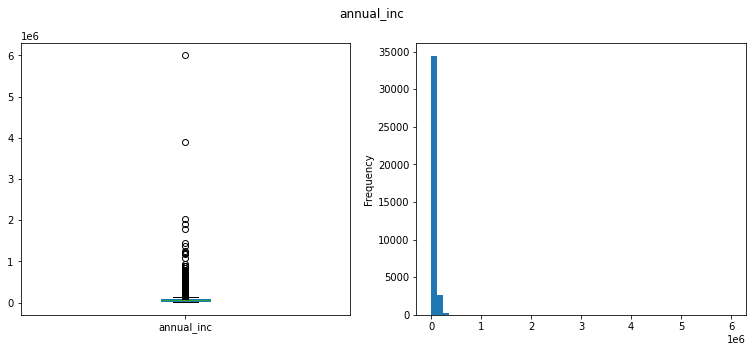

In [ ]:
# Variable = annual_inc
# The self-reported annual income provided by the borrower during registration.
# From the plots, we can see that this variable contains outliers.
# In the next cell, we reconstruct these plots and recompute these metrics after removing outliers.

col='annual_inc'
plotUniBoxHistPlot(df,col,bins=50)

count    31510.000000
mean     54499.765305
std      20500.813715
min       4000.000000
25%      39000.000000
50%      52800.000000
75%      70000.000000
max      99999.000000
Name: annual_inc, dtype: float64



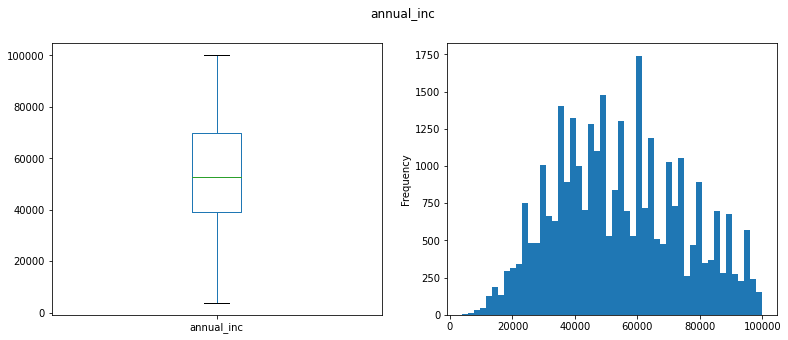

In [ ]:
# The average annual wage of a typical US citizen is $50,000-60,0000 (ref:https://policyadvice.net/insurance/insights/average-american-income/#:~:text=What%20is%20the%20average%20American%20Wage%3F,tendency%20for%20all%20the%20data.)
# We little bit higher cut-off of $100000 to not loose lot of data
# The plots and metrics are reconstructed below
# The average annual income of borrowers is $54499.77.

col='annual_inc'
df1=df[df[col]<100000]
plotUniBoxHistPlot(df1,col,bins=50)

count    37433.000000
mean        13.290727
std          6.658330
min          0.000000
25%          8.170000
50%         13.390000
75%         18.550000
max         29.990000
Name: dti, dtype: float64



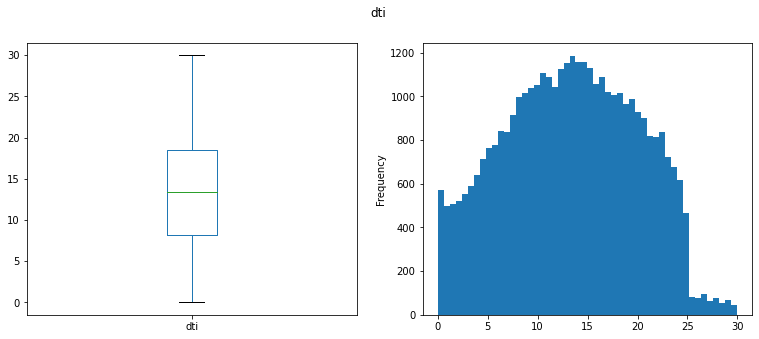

In [ ]:
# Variable = dti
# It is the A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, \
# excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income.
# The average dti of the borrowers is 13.29.

col='dti'
plotUniBoxHistPlot(df,col,bins=50)

count    37433.000000
mean        11.955679
std          3.681929
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64



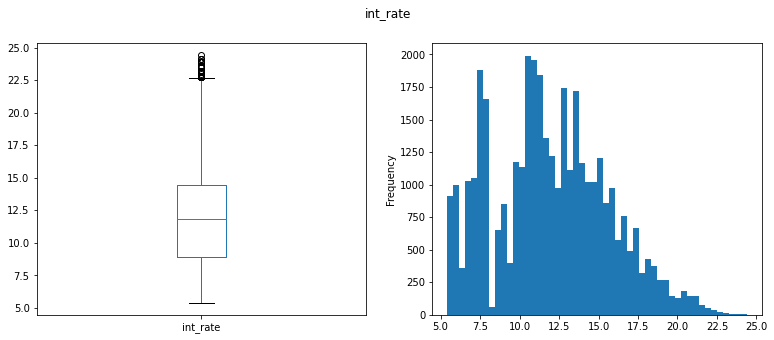

In [ ]:
# Variable = int_rate
# It is the Interest Rate on the loan.
# The average interest rate on the loans is ~12%.

col='int_rate'
plotUniBoxHistPlot(df,col,bins=50)

count    37433.000000
mean      2777.065155
std       4519.197987
min          0.000000
25%        222.170000
50%        582.290000
75%       3512.550000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64



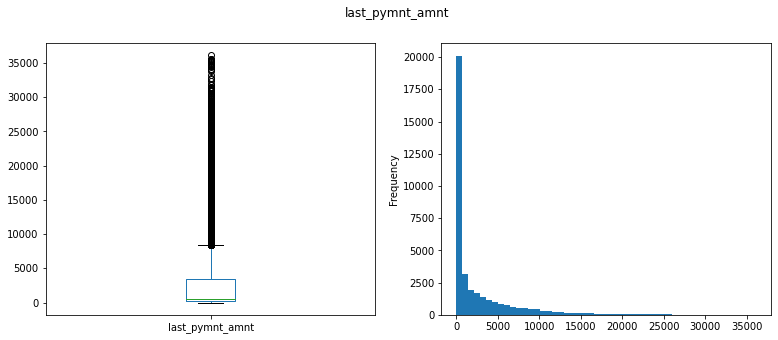

In [ ]:
# Variable = last_pymnt_amnt
# It is the last total payment amount received from the borrower.
# From the plots, we can see that this variable contains outliers.
# In the next cell, we reconstruct these plots and recompute these metrics after removing outliers.

col='last_pymnt_amnt'
plotUniBoxHistPlot(df,col,bins=50)

count    34554.000000
mean      1723.472354
std       2370.701510
min          0.000000
25%        205.515000
50%        491.695000
75%       2442.645000
max       9997.150000
Name: last_pymnt_amnt, dtype: float64



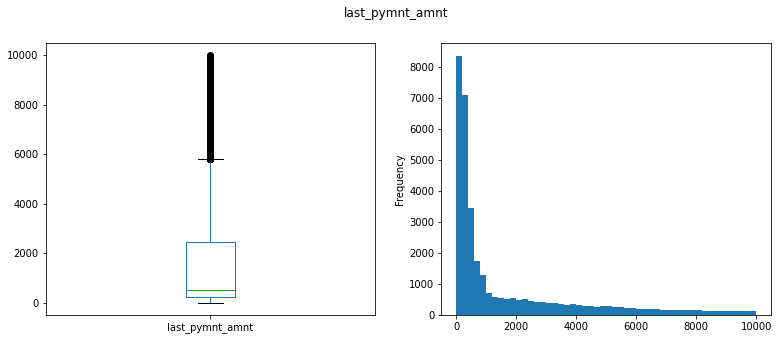

In [ ]:
# The average amount of last payment received by the borrowers is $1723.47.

col='last_pymnt_amnt'
df1=df[df[col]<10000]
plotUniBoxHistPlot(df1,col,bins=50)

count    37433.000000
mean     11131.332648
std       7352.376591
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64



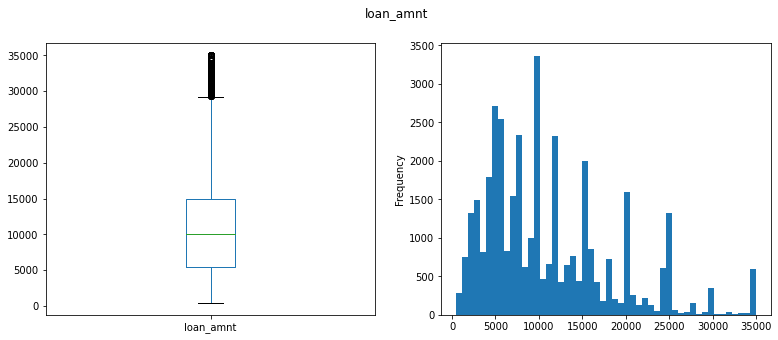

In [ ]:
# Variable = loan_amnt
# The the amount of the loan applied for by the borrower.
# The average loan amount is ~$11131.

col='loan_amnt'
plotUniBoxHistPlot(df,col,bins=50)

count    37433.000000
mean        97.538772
std        701.408342
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64



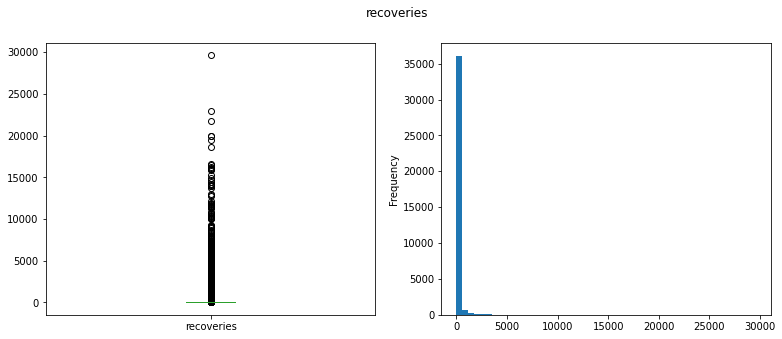

In [ ]:
# Variable = recoveries
# It is the amount recovered after applicant has defaulted.
# The average amount of recovered is ~$97.
# The distribution shows that in most cases the lending club is unable to recover any amount.

col='recoveries'
plotUniBoxHistPlot(df,col,bins=50)

count     37433.000000
mean      13389.842198
std       15904.465473
min           0.000000
25%        3714.000000
50%        8863.000000
75%       17035.000000
max      149588.000000
Name: revol_bal, dtype: float64



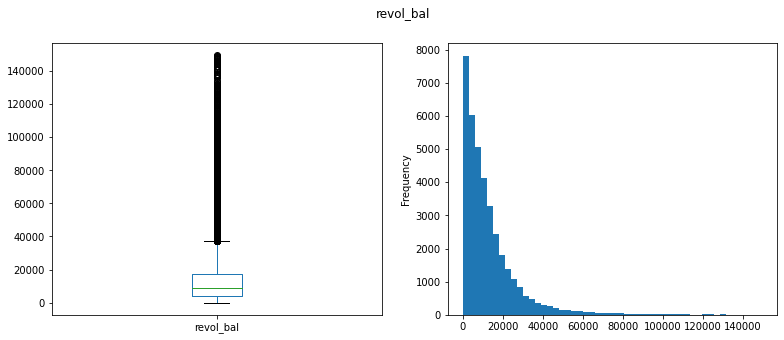

In [ ]:
# Variable = revol_bal
# It is the total credit revolving balance.
# In credit card terms, a revolving balance is the portion of credit card spending \
# that goes unpaid at the end of a billing cycle. 
# From the plots, we can see that this variable contains outliers.
# In the next cell, we reconstruct these plots and recompute these metrics after removing outliers.

col='revol_bal'
plotUniBoxHistPlot(df,col,bins=50)

count    36154.000000
mean     11189.925928
std      10041.903299
min          0.000000
25%       3562.000000
50%       8473.000000
75%      15875.250000
max      49975.000000
Name: revol_bal, dtype: float64



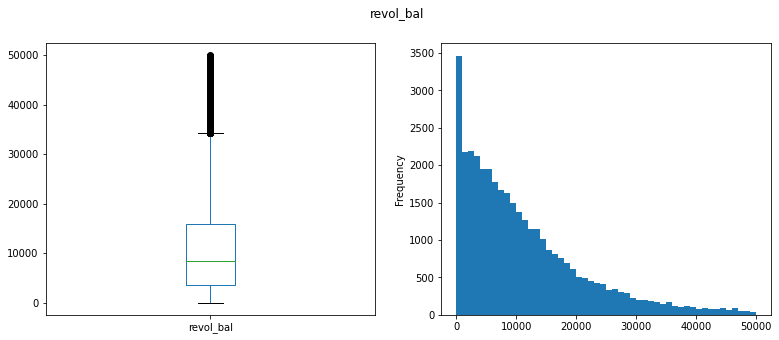

In [ ]:
# The average total credit revolving balance for a typical borrow is $11190
# From the distribution we can see that most of the customers do not have 0 revolving balance.

col='revol_bal'
df1=df[df[col]<50000]
plotUniBoxHistPlot(df1,col,bins=50)

count    37433.000000
mean        48.861928
std         28.341021
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64



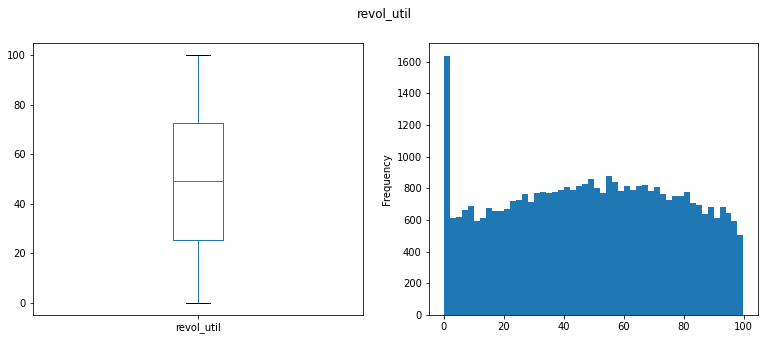

In [ ]:
# Variable = revol_util
# It is the revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# The mean revolving line utilization rate is 48%.
 
col='revol_util'
plotUniBoxHistPlot(df,col,bins=50)

count    37433.000000
mean        22.107712
std         11.412473
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64



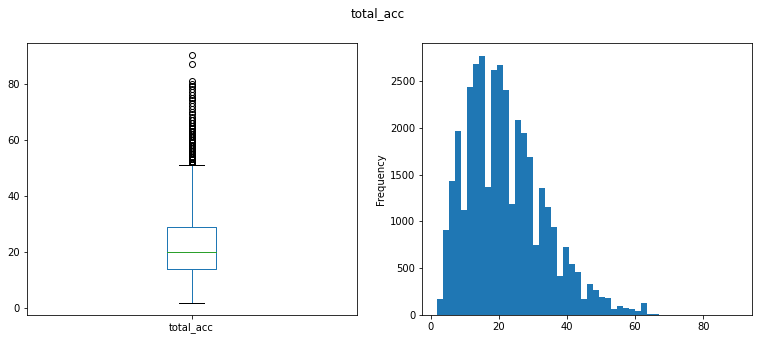

In [ ]:
# Variable = total_acc
# It is the total number of credit lines currently in the borrower's credit file.
# Borrowers have 22 credit lines on average.  

col='total_acc'
plotUniBoxHistPlot(df,col,bins=50)

count    37433.000000
mean     11985.633298
std       8819.368109
min         33.730000
25%       5581.772363
50%       9811.445233
75%      16272.119970
max      58563.679930
Name: total_pymnt, dtype: float64



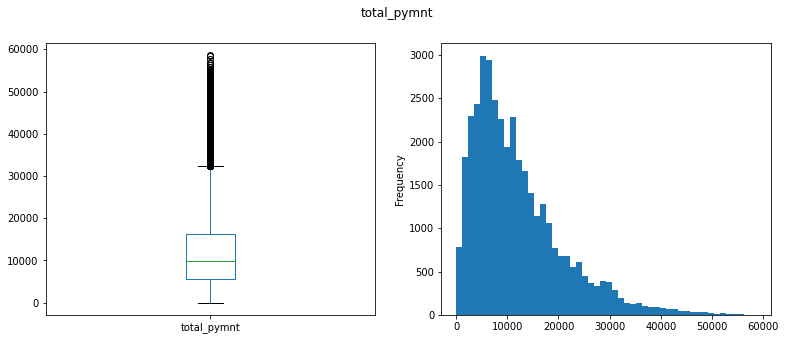

In [ ]:
# Variable = total_pymnt
# It is the Payments received to date for total amount funded from the borrower
# The average payment received from the borrower is $11985.

col='total_pymnt'
plotUniBoxHistPlot(df,col,bins=50)

count    37433.000000
mean         1.380666
std          7.368810
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64



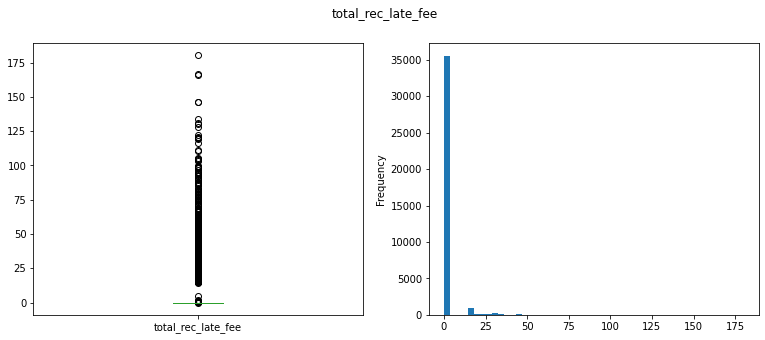

In [ ]:
# Variable = total_rec_late_fee
# It is the amount of late fees received to date from the borrower.
# The mean late fees are $1.38, which is very small.
# From the distribution, we can see that most of the borrowers have 0 late fees.

col='total_rec_late_fee'
plotUniBoxHistPlot(df,col,bins=50)

# Outlier Variables

In [ ]:
# Here define a dictionary of outliers identified during univariate analysis.
# We use this dictionary during segmented and bivariate analysis.

outlier_vars={'annual_inc':100000,'last_pymnt_amnt':10000,'revol_bal':50000}

# Segemented Univariate Analysis
Method: For segmented univariate analysis, we group data into two segments based on loan_status(ie. Fully Paid	and Charged Off) and perform univariate analysis on each of them. The groups are formed based on the variable of interest (ie. loan_status). We use the same protocol outlined above in the univariate analysis of categorical and continuous variables.

## Categorical Variables

In [ ]:
cat_vars

['addr_state',
 'emp_length',
 'grade',
 'home_ownership',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies']

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

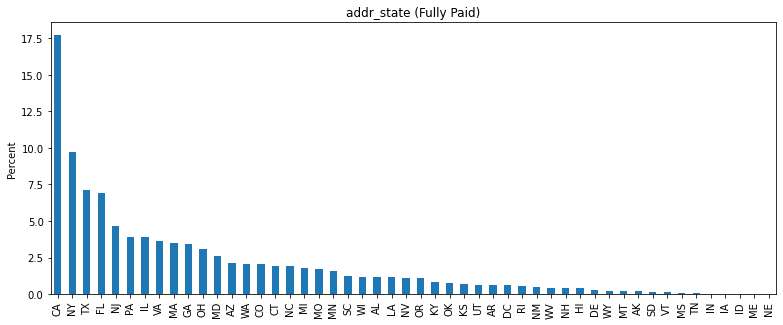

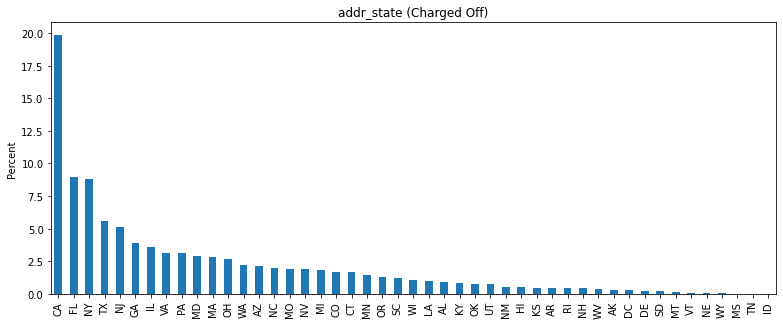

In [ ]:
# The top states (eg. California, New York, Florida, Texas, New Jersey, Illinois)\
# have high percentage of fully paid borrowers. 
# These states also have high percentage of Defaulters.
# Therefore, approving loans in these state is profitable as well as risky.

col='addr_state'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

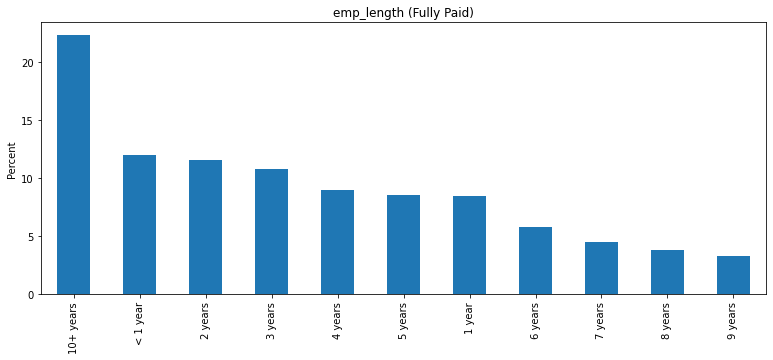

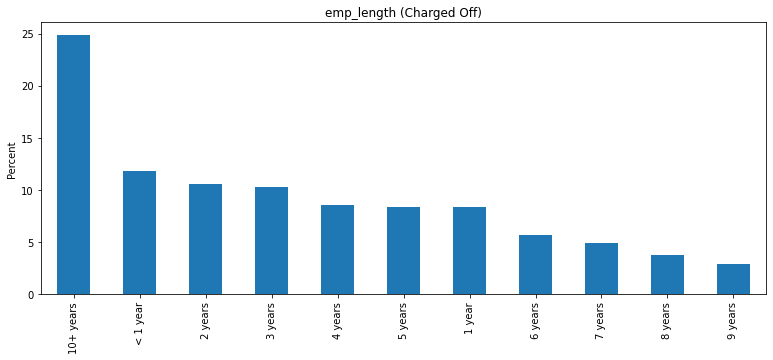

In [ ]:
# Borrowers having more than 10 years and less than 1 year of employment are more risky.

col='emp_length'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

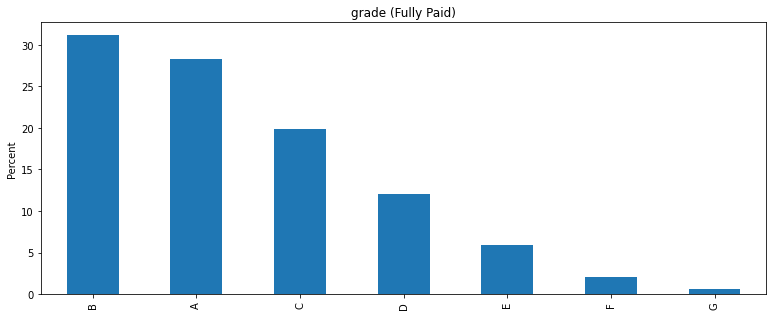

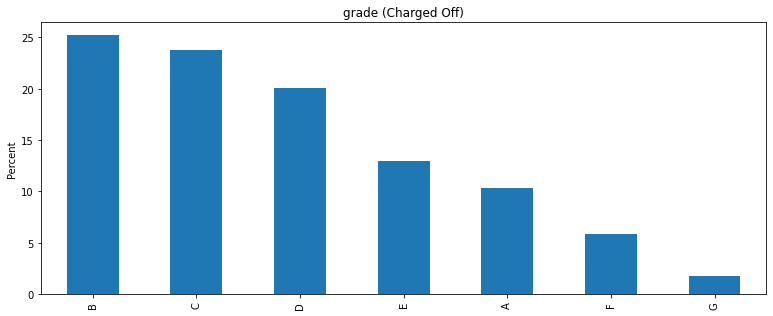

In [ ]:
# From the distributions below, we can seen that grade B have large number of Fully Paid customers and Defaulters.
# However, grade A has more percentage of Fully Paid than Defaulter.
# It looks like Grade A borrowers are most profitable.
# Whereas Grad B and C borrowers are risky.

col='grade'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

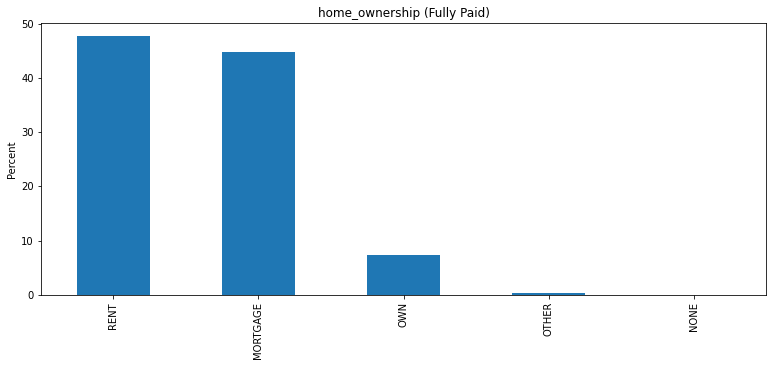

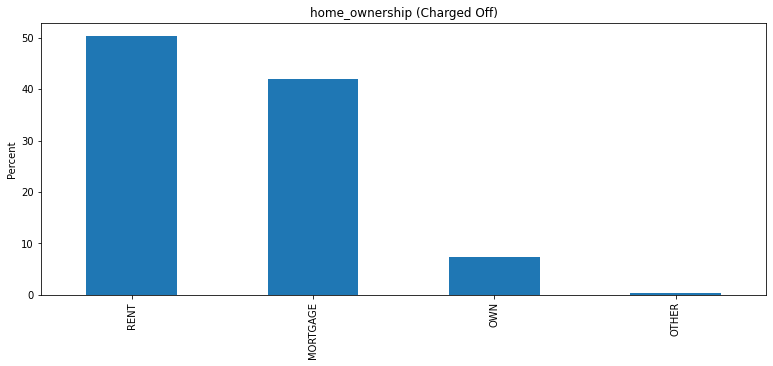

In [ ]:
# The borrows with rented or mortgate homes are risky.

col='home_ownership'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

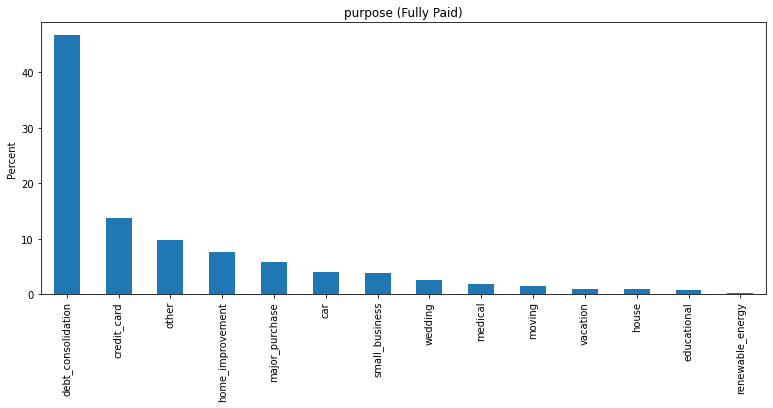

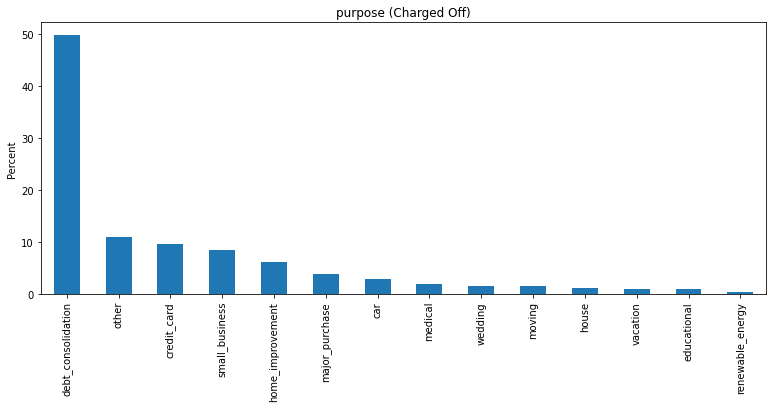

In [ ]:
# Borrowers with taking loan with the purpose of debt consolidation and credit card are most risky.

col='purpose'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

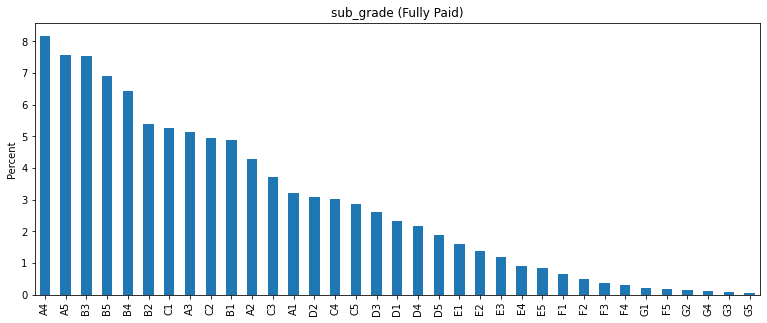

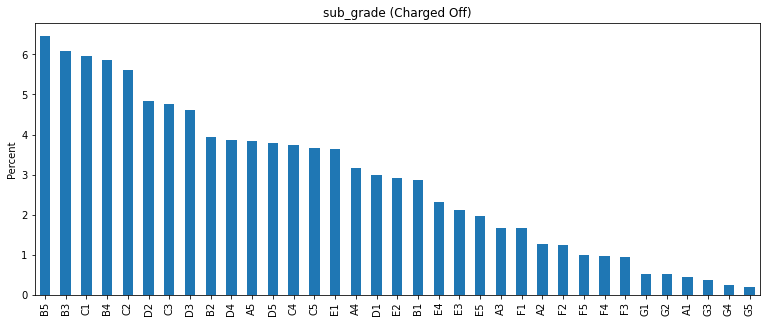

In [ ]:
# Borrowers with B5 and B3 sub grades are most risky.
# Borrowers with sub grade of A4 and A5 are most profitable.

col='sub_grade'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

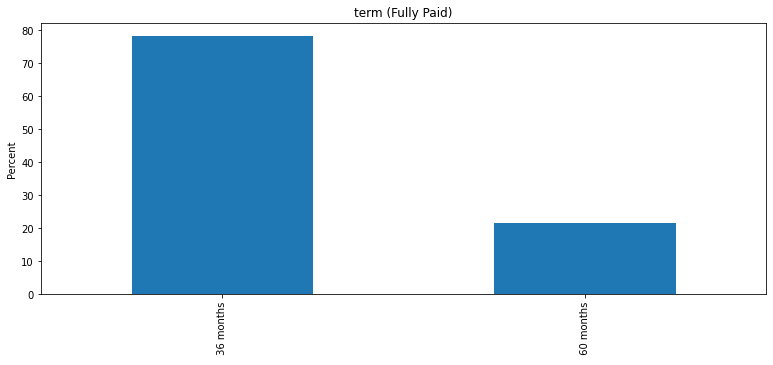

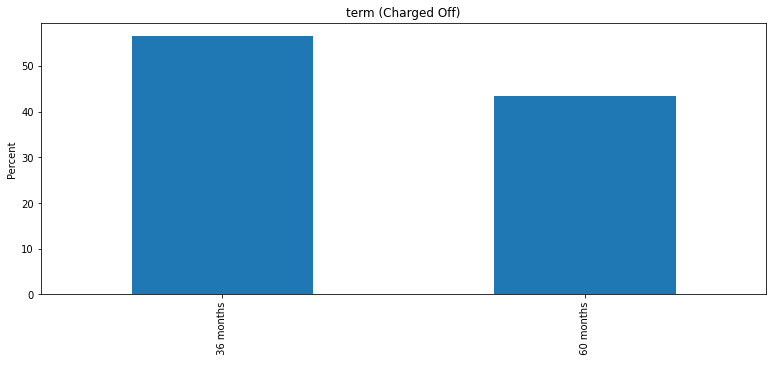

In [ ]:
# Borrowere with 36 months therms are risky as well as profitable.
# Borrowers with 60 months terms are most risky.
 
col='term'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

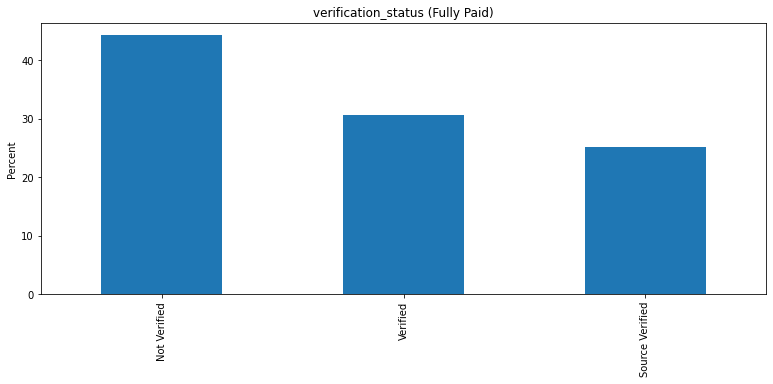

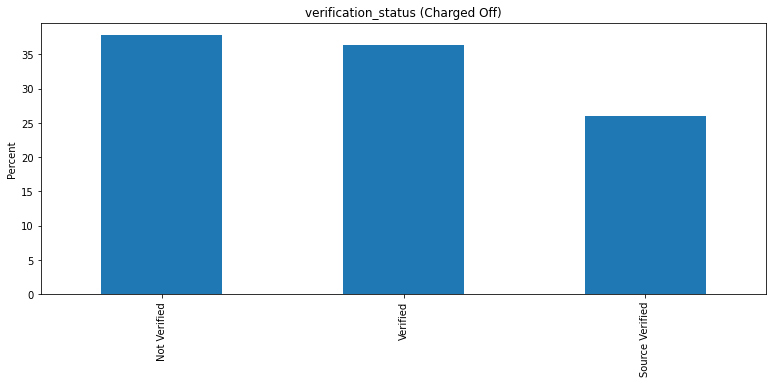

In [ ]:
# Borrowers with Not Verified status are both profitable as well as risky.

col='verification_status'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

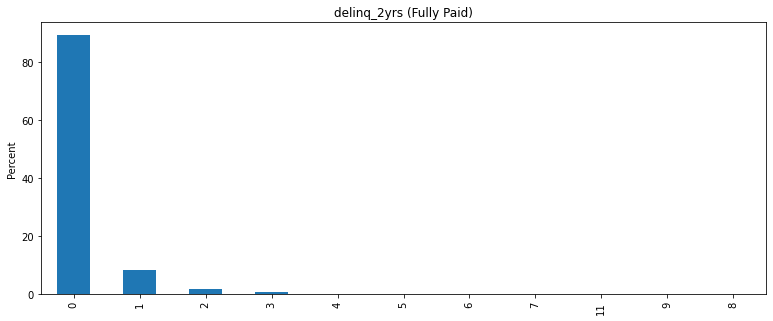

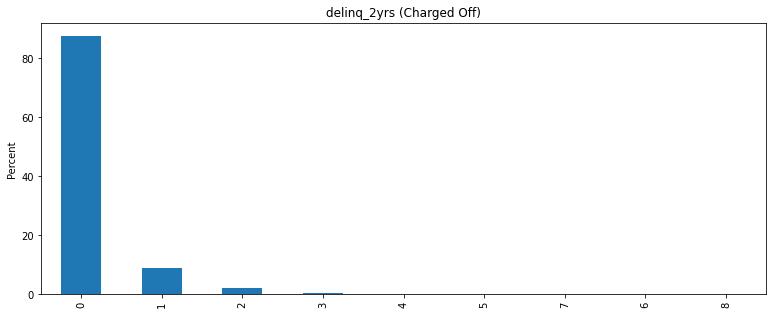

In [ ]:
# It is difficult to conclusive from these distributions as they show very similar patterns.

col='delinq_2yrs'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

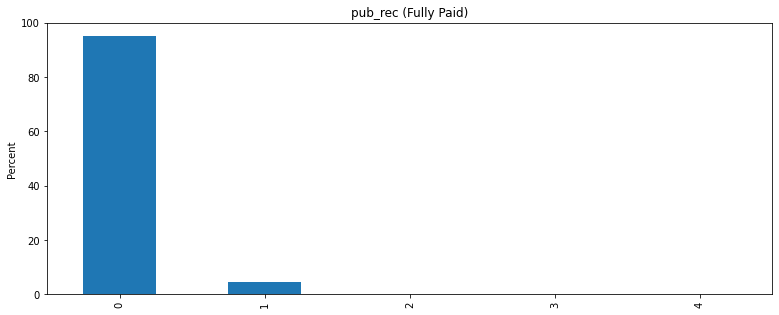

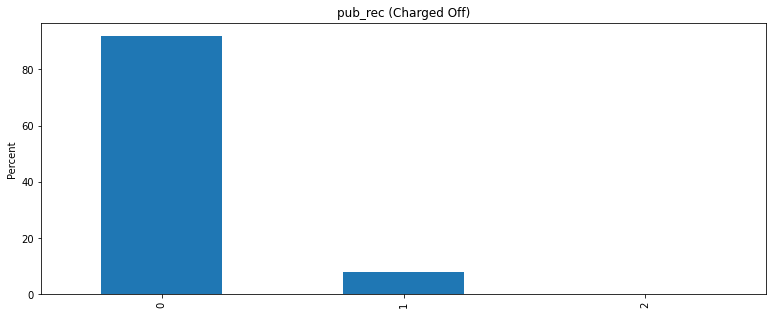

In [ ]:
# It is difficult to conclusive from these distributions as they show very similar patterns.

col='pub_rec'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

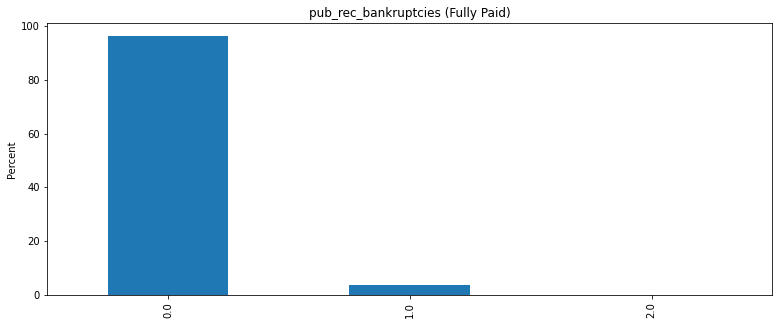

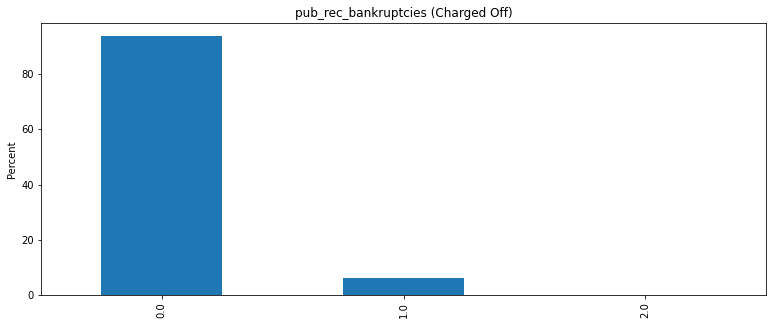

In [ ]:
# It is difficult to draw conclusion from these distributions as they show very similar patterns.

col='pub_rec_bankruptcies'
df1=df[df['loan_status']=='Fully Paid']
plotUniDist(df1,col,figsize=(13,5),title=f'{col} (Fully Paid)')
df2=df[df['loan_status']=='Charged Off']
plotUniDist(df2,col,figsize=(13,5),title=f'{col} (Charged Off)')

## Continuous Variables

In [ ]:
num_vars

['annual_inc',
 'dti',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'recoveries',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_rec_late_fee']

count    26826.000000
mean     54942.091284
std      20520.866197
min       4000.000000
25%      39881.250000
50%      53376.000000
75%      70000.000000
max      99996.000000
Name: annual_inc, dtype: float64



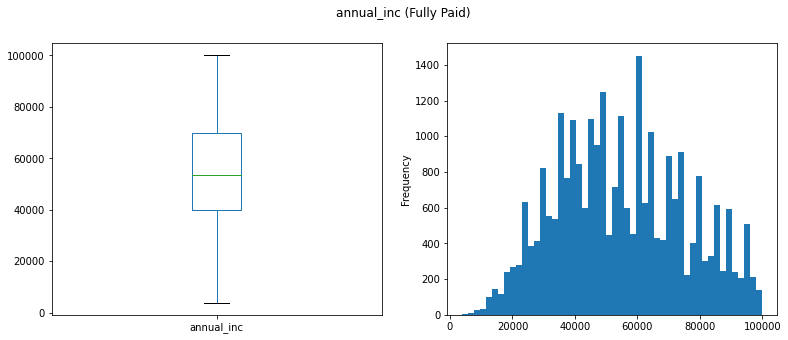



count     4684.000000
mean     51966.495297
std      20202.019705
min       4080.000000
25%      36000.000000
50%      50000.000000
75%      65004.000000
max      99999.000000
Name: annual_inc, dtype: float64



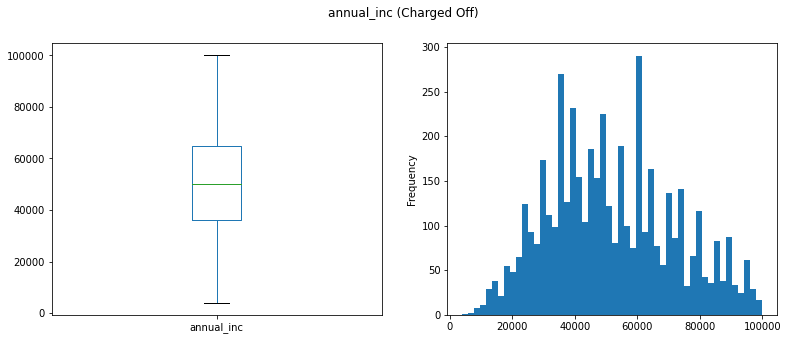

In [ ]:
col='annual_inc'
df1=df[df['loan_status']=='Fully Paid']
df1=df1[df1[col]<outlier_vars[col]]
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
df2=df2[df2[col]<outlier_vars[col]]
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.000000
mean        13.171516
std          6.666593
min          0.000000
25%          8.020000
50%         13.220000
75%         18.410000
max         29.990000
Name: dti, dtype: float64



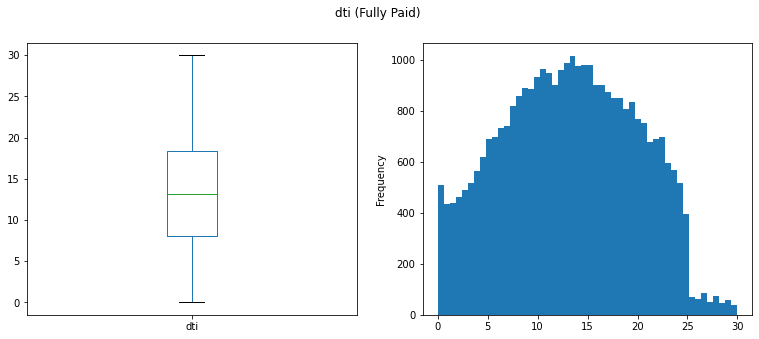



count    5321.000000
mean       14.010162
std         6.563051
min         0.000000
25%         9.130000
50%        14.330000
75%        19.280000
max        29.850000
Name: dti, dtype: float64



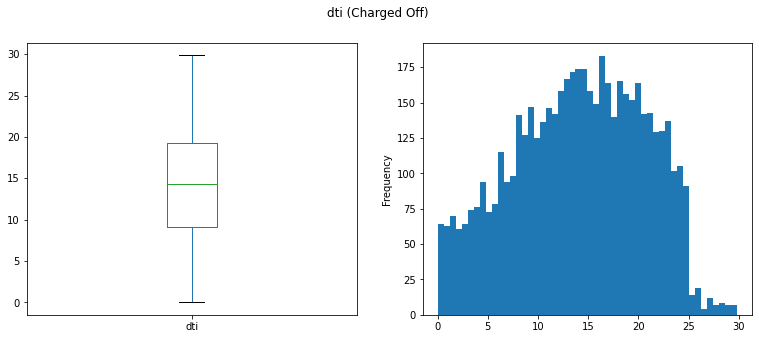

In [ ]:
col='dti'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.000000
mean        11.637678
std          3.590645
min          5.420000
25%          8.590000
50%         11.490000
75%         13.990000
max         24.110000
Name: int_rate, dtype: float64



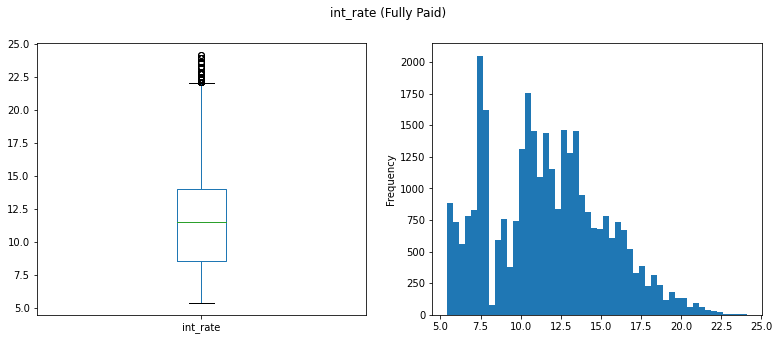



count    5321.000000
mean       13.874800
std         3.643087
min         5.420000
25%        11.360000
50%        13.610000
75%        16.450000
max        24.400000
Name: int_rate, dtype: float64



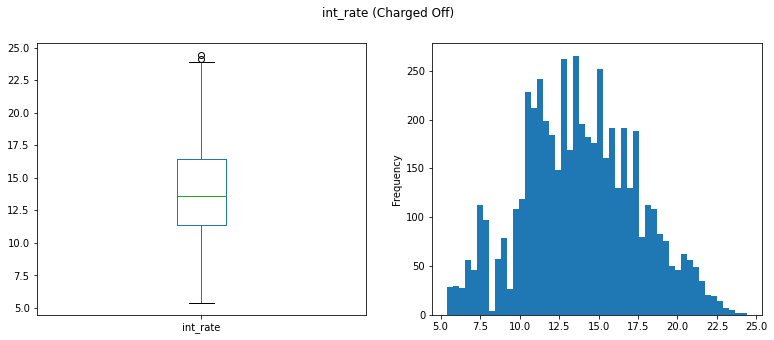

In [ ]:
col='int_rate'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    29239.000000
mean      1978.390480
std       2488.395833
min          0.000000
25%        234.950000
50%        651.290000
75%       3056.515000
max       9997.150000
Name: last_pymnt_amnt, dtype: float64



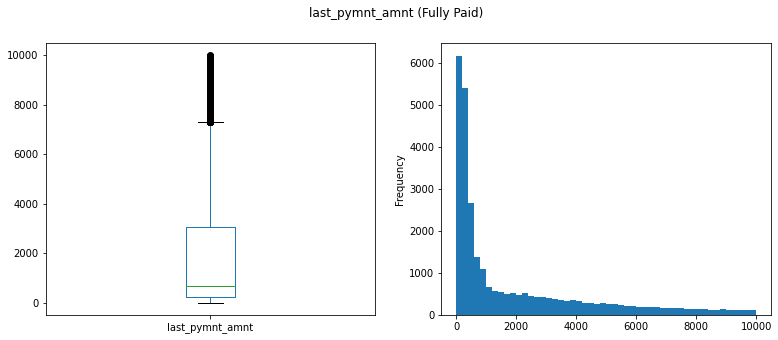



count    5315.000000
mean      321.110905
std       387.520520
min         0.010000
25%       120.685000
50%       245.340000
75%       413.825000
max      8600.000000
Name: last_pymnt_amnt, dtype: float64



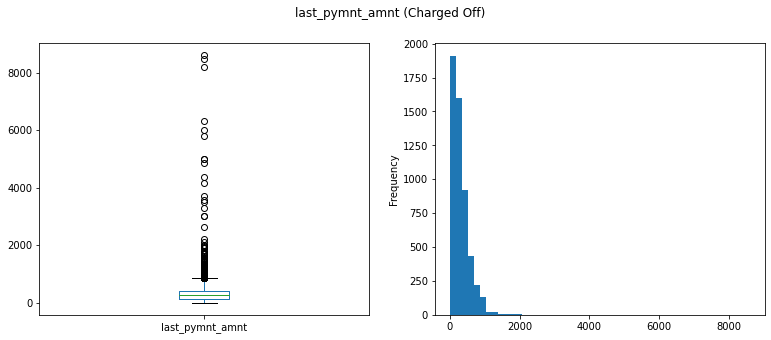

In [ ]:
col='last_pymnt_amnt'
df1=df[df['loan_status']=='Fully Paid']
df1=df1[df1[col]<outlier_vars[col]]
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
df2=df2[df2[col]<outlier_vars[col]]
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.000000
mean     10937.218174
std       7206.537155
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64



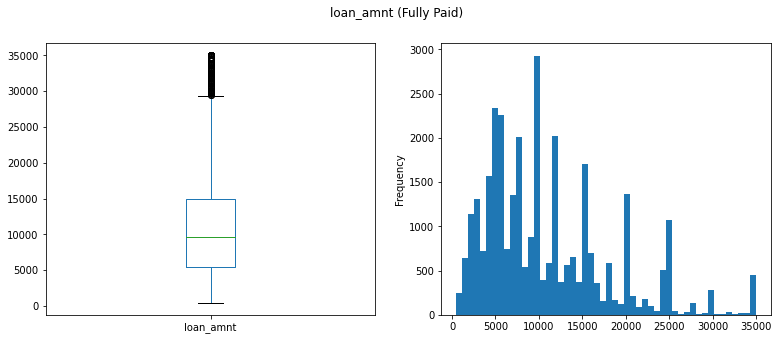



count     5321.000000
mean     12302.804924
std       8079.812342
min        900.000000
25%       6000.000000
50%      10000.000000
75%      17000.000000
max      35000.000000
Name: loan_amnt, dtype: float64



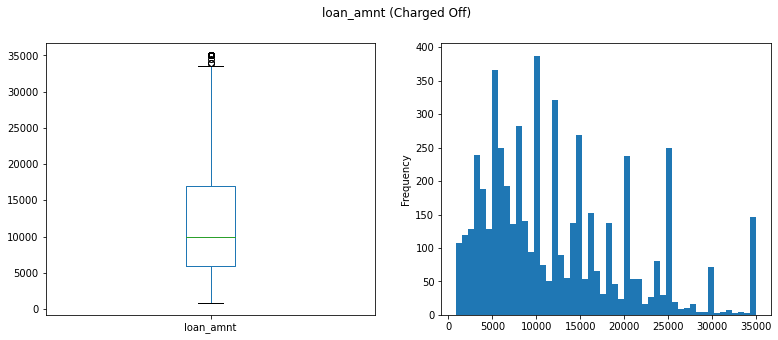

In [ ]:
col='loan_amnt'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: recoveries, dtype: float64



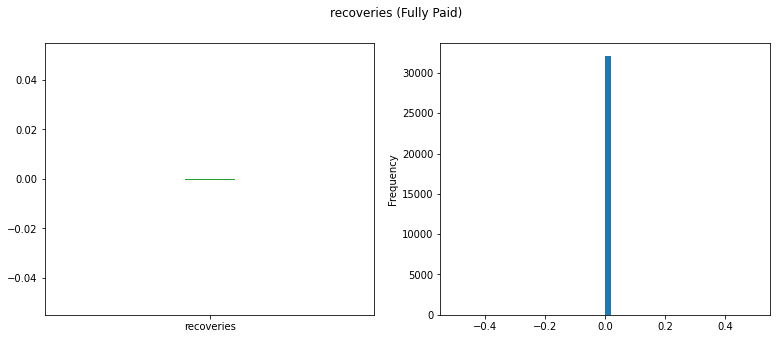



count     5321.000000
mean       686.180952
std       1748.593750
min          0.000000
25%          9.430000
50%        180.560000
75%        608.690000
max      29623.350000
Name: recoveries, dtype: float64



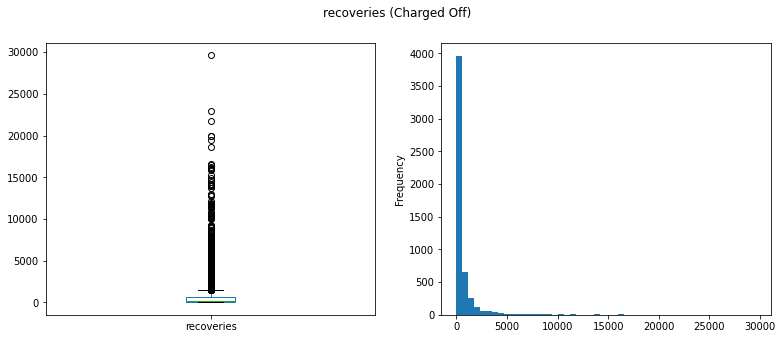

In [ ]:
col='recoveries'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    30990.000000
mean     11071.686286
std       9962.301445
min          0.000000
25%       3487.000000
50%       8359.500000
75%      15695.750000
max      49975.000000
Name: revol_bal, dtype: float64



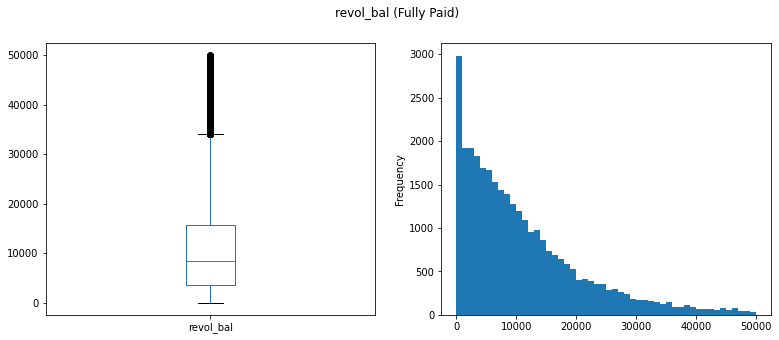



count     5164.000000
mean     11899.501162
std      10479.955426
min          0.000000
25%       3969.000000
50%       9061.500000
75%      16778.750000
max      49677.000000
Name: revol_bal, dtype: float64



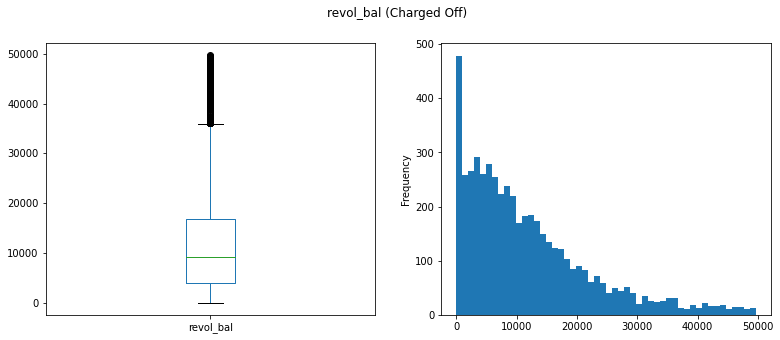

In [ ]:
col='revol_bal'
df1=df[df['loan_status']=='Fully Paid']
df1=df1[df1[col]<outlier_vars[col]]
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
df2=df2[df2[col]<outlier_vars[col]]
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.000000
mean        47.708129
std         28.255831
min          0.000000
25%         24.100000
50%         47.800000
75%         70.955000
max         99.900000
Name: revol_util, dtype: float64



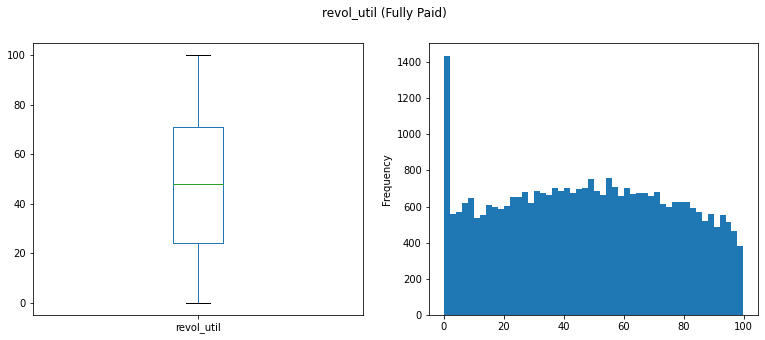



count    5321.000000
mean       55.825054
std        27.855639
min         0.000000
25%        34.800000
50%        58.900000
75%        79.200000
max        99.900000
Name: revol_util, dtype: float64



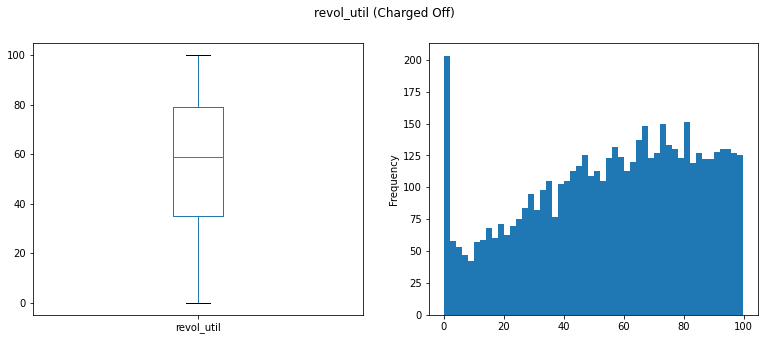

In [ ]:
col='revol_util'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.00000
mean        22.19214
std         11.40016
min          2.00000
25%         14.00000
50%         21.00000
75%         29.00000
max         90.00000
Name: total_acc, dtype: float64



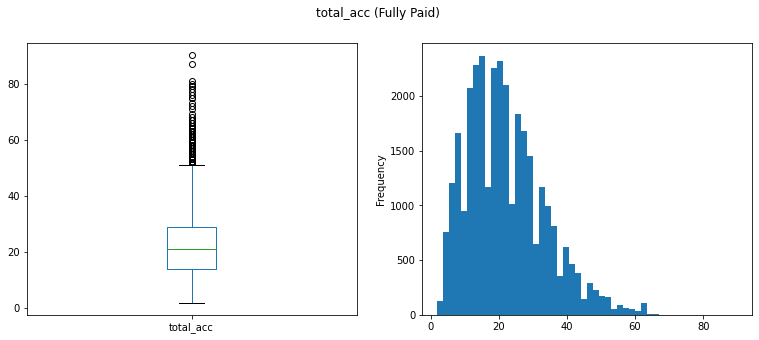



count    5321.000000
mean       21.598196
std        11.474399
min         2.000000
25%        13.000000
50%        20.000000
75%        29.000000
max        74.000000
Name: total_acc, dtype: float64



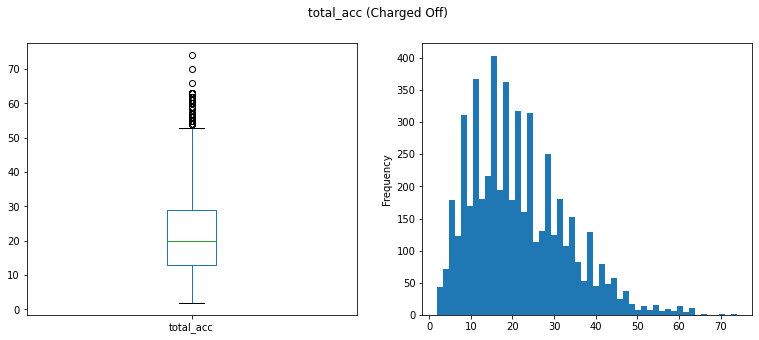

In [ ]:
col='total_acc'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.000000
mean     12811.771503
std       8863.724627
min        526.332241
25%       6205.109713
50%      10788.018060
75%      17126.859073
max      58563.679930
Name: total_pymnt, dtype: float64



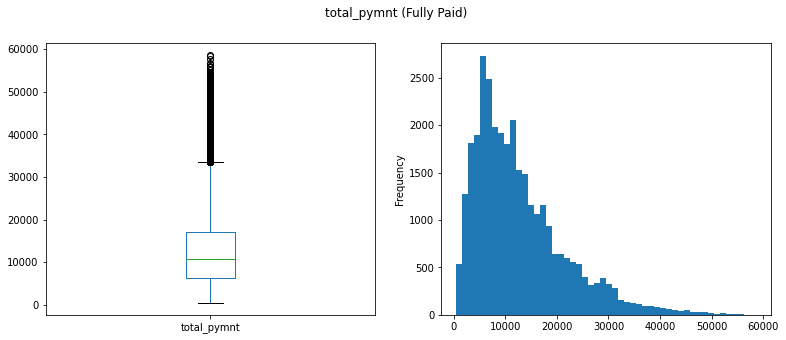



count     5321.000000
mean      6999.925716
std       6639.272644
min         33.730000
25%       2342.900000
50%       4985.810000
75%       9403.700000
max      51745.450000
Name: total_pymnt, dtype: float64



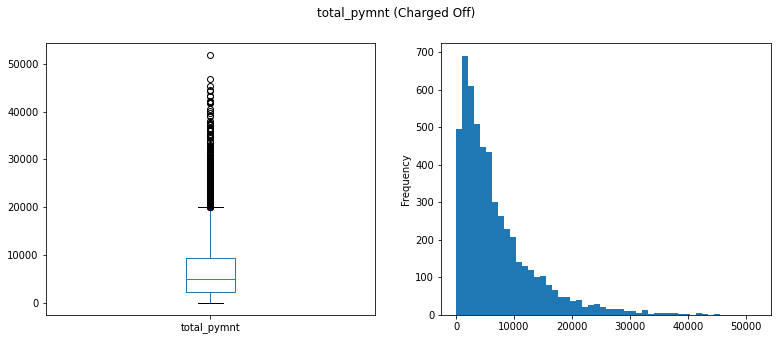

In [ ]:
col='total_pymnt'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

count    32112.000000
mean         0.874430
std          5.764138
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        165.690000
Name: total_rec_late_fee, dtype: float64



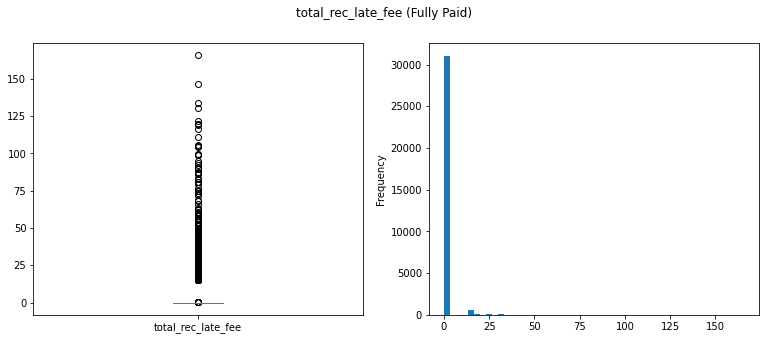



count    5321.000000
mean        4.435776
std        13.062477
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       180.200000
Name: total_rec_late_fee, dtype: float64



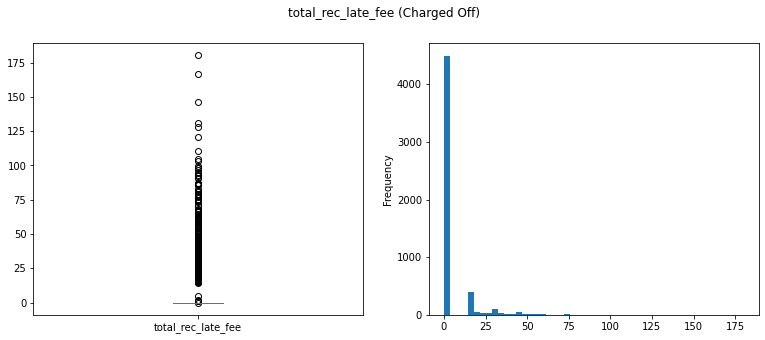

In [ ]:
col='total_rec_late_fee'
df1=df[df['loan_status']=='Fully Paid']
plotUniBoxHistPlot(df1,col,bins=50,title=f'{col} (Fully Paid)')
print('\n')
df2=df[df['loan_status']=='Charged Off']
plotUniBoxHistPlot(df2,col,bins=50,title=f'{col} (Charged Off)')

# Bivariate Analysis
Bivariate analysis is performed with respect to the target variable which is the variabl of interest (ie. loan_status)

## Categorical Variables

In [ ]:
cat_vars

['addr_state',
 'emp_length',
 'grade',
 'home_ownership',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies']

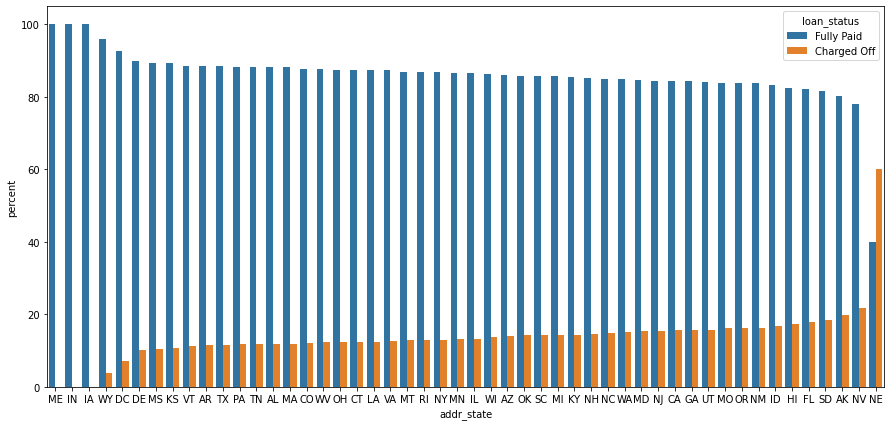

In [ ]:
# Nebraska(NE) has more percentage of defaulter than Fully Paid borrower. 
# Hence, borrowers from Nebraska and we should be careful while approving the loans for them.
# The percentage of Full Paid borrower is significatly higher in other states.
# Hence, this variable is not a strong indicator of default.

col='addr_state'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

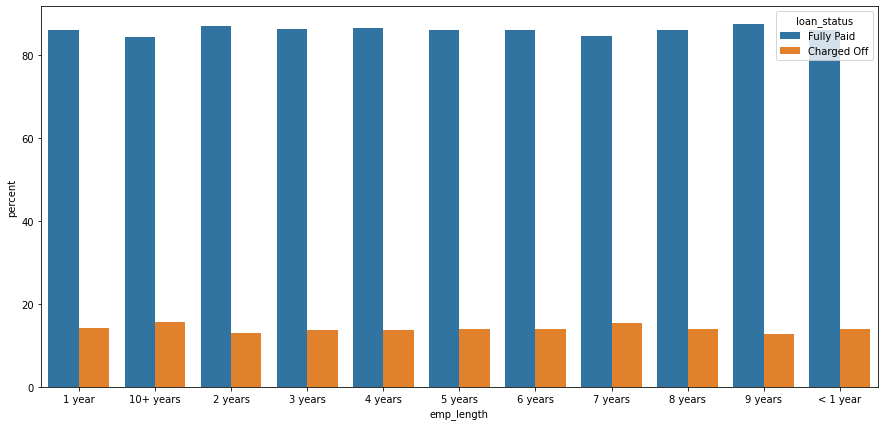

In [ ]:
# This variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of default.

col='emp_length'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index().sort_values(col)
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

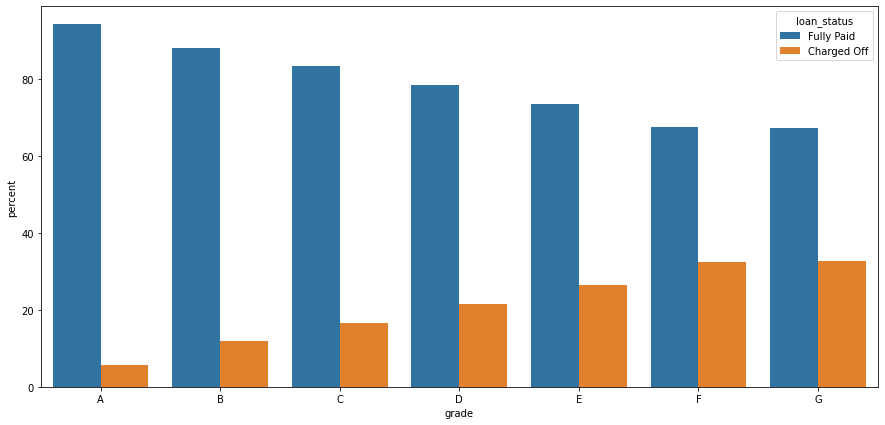

In [ ]:
# Borrowers having grades E, F, G are risky.
# This variable is strong indicator of default.

col='grade'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

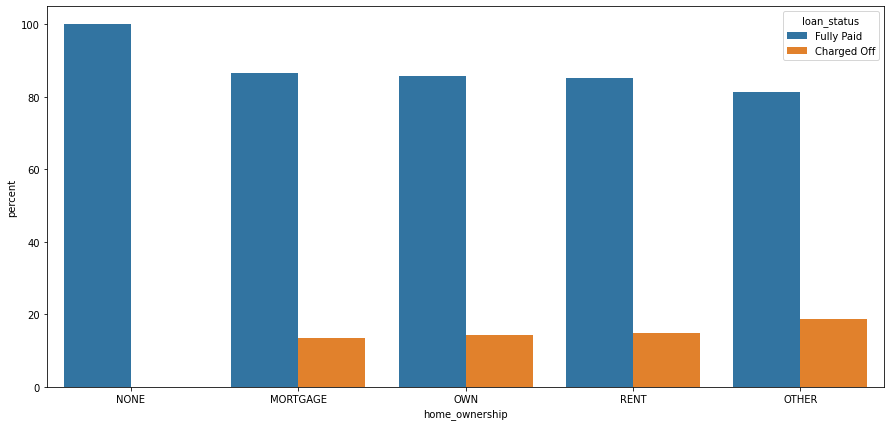

In [ ]:
# This variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of default.

col='home_ownership'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

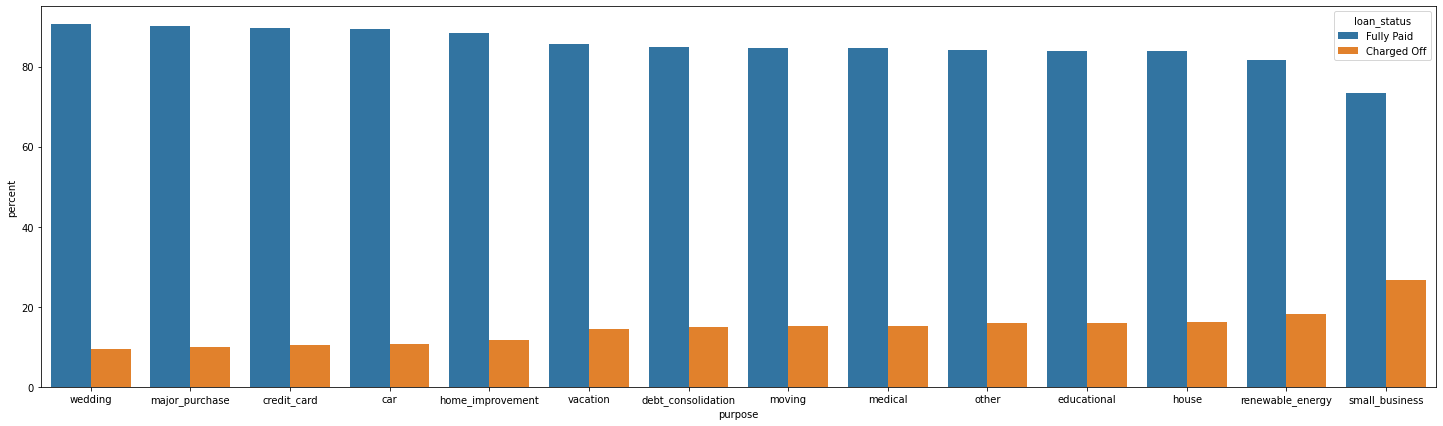

In [ ]:
# The borrowers with the purpose of small business are more risky than others.
# However, this variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of default.

col='purpose'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(25,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

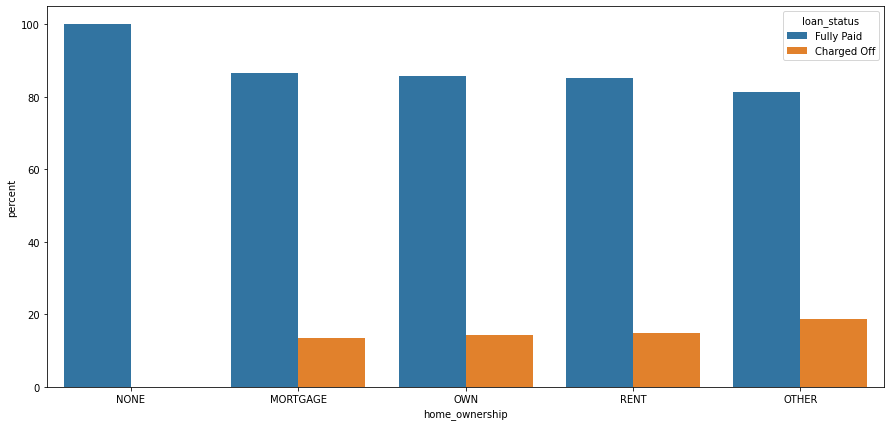

In [ ]:
# This variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of default.

col='home_ownership'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

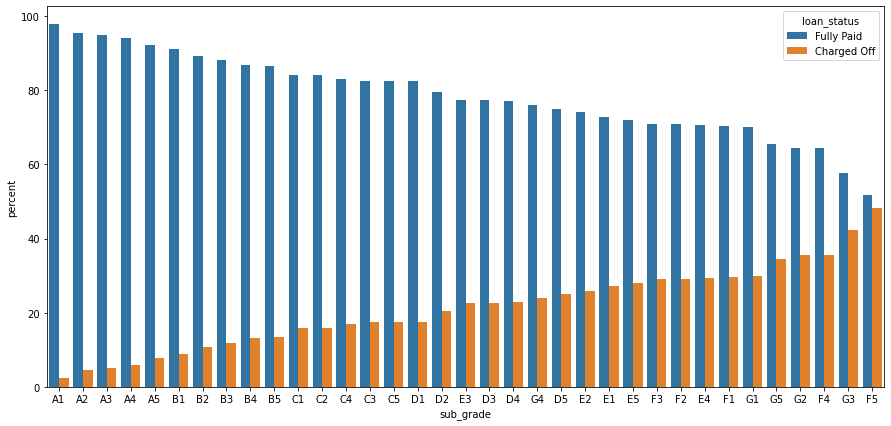

In [ ]:
# Borrowers with sub grade F5, G3 and F4 are more risky than others.
# This variable is strong indicators of default.

col='sub_grade'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

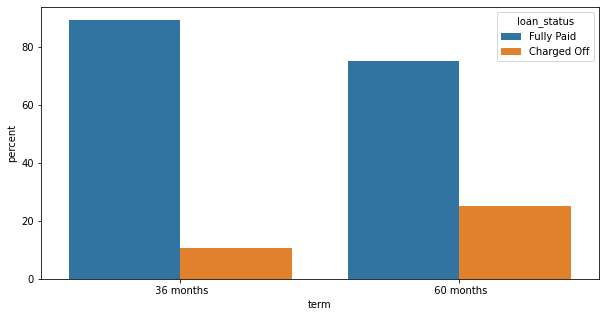

In [ ]:
# Although percentage of Defaulter with 60 month term are higher than 36 month term \
# we don't consider it as a strong indicator for default.
col='term'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

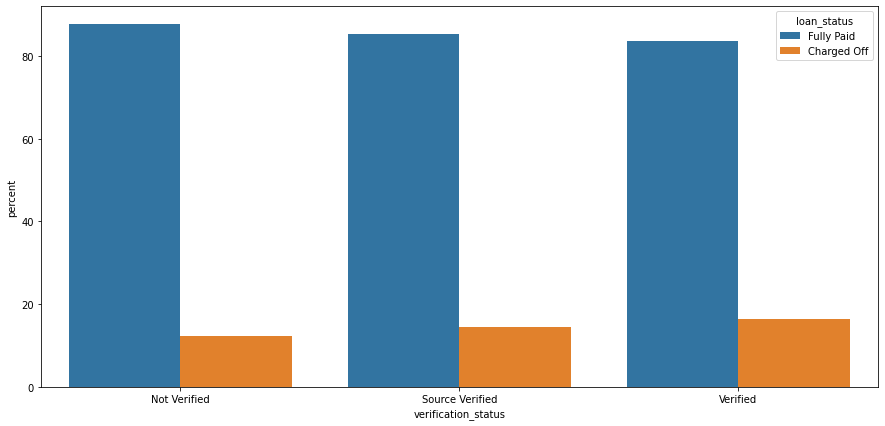

In [ ]:
# This variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of default.

col='verification_status'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

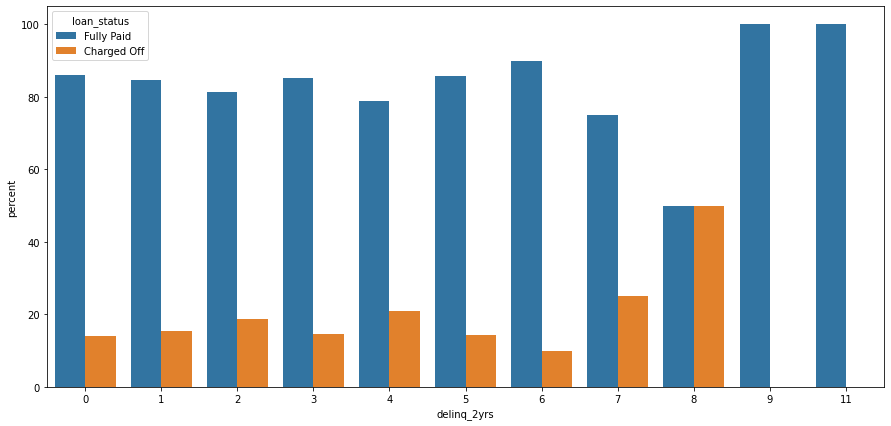

In [ ]:
# From its definition this variable should be a strong veriable for the default.
# But from the data it does not look like a strong indicator of default.
# No defaulter at high values (ie. 9 & 11) is surprising.

col='delinq_2yrs'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

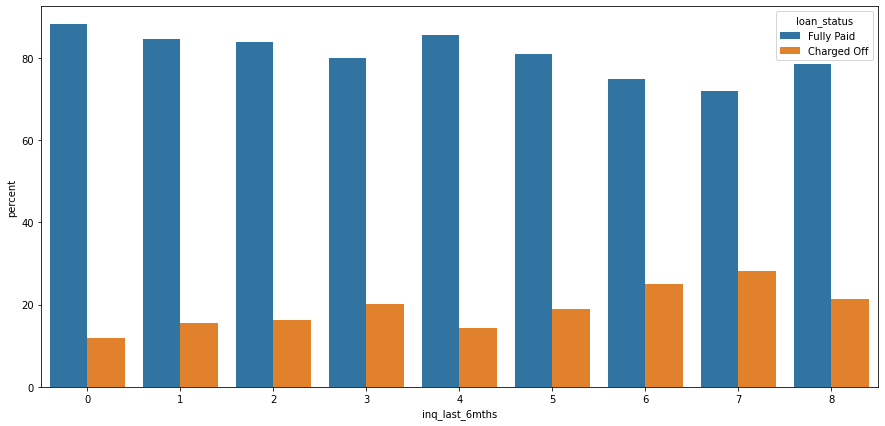

In [ ]:
# This variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of defaulters.
# But it is a weak indicator. High inquiries by the borrower may increase the likelihood of default.

col='inq_last_6mths'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

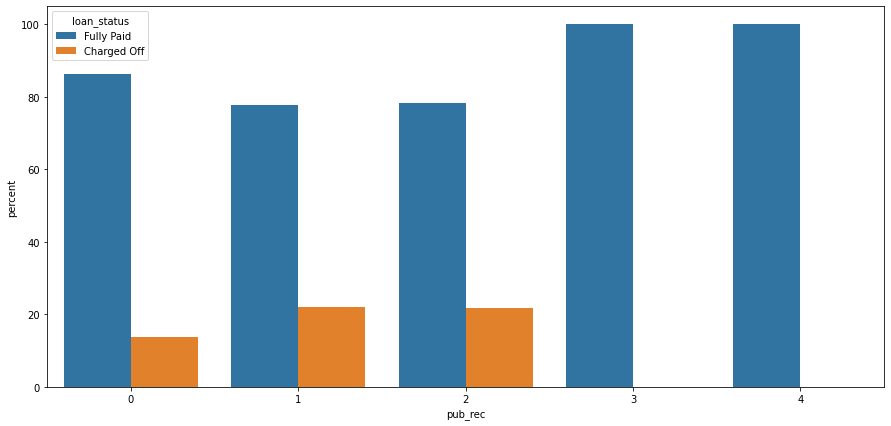

In [ ]:
# This variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of default.

col='pub_rec'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

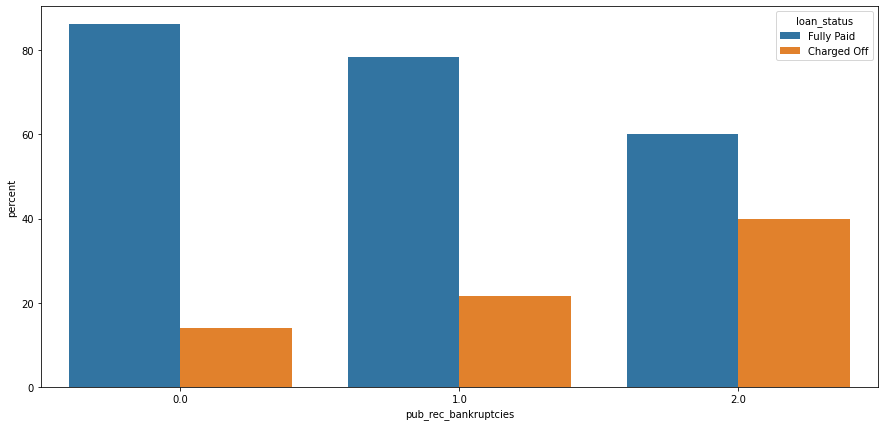

In [ ]:
# The number of defaulters increase with the number of public bankruptcies.
# Hence, this is a strong indicator of default. 

col='pub_rec_bankruptcies'
df1=df.groupby([col])['loan_status'].value_counts(normalize=True).mul(100).rename('percent').sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=col,y='percent',data=df1,hue='loan_status')

## Continuous Variables

In [ ]:
num_vars

['annual_inc',
 'dti',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'recoveries',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_rec_late_fee']

In [ ]:
def biContVars(df,col):
  _df=df[['loan_status',col]].groupby('loan_status').agg(mean=(col,np.mean),
                                                            q_25=(col, lambda x: np.quantile(x,0.25)),
                                                            q_50=(col, lambda x: np.quantile(x,0.50)),
                                                            q_75=(col, lambda x: np.quantile(x,0.75))
                                                            ).apply(lambda x:round(x,2)).reset_index()
  print(_df)
  print()
  sns.boxplot(x="loan_status", y=col ,data=df)

   loan_status      mean      q_25     q_50     q_75
0  Charged Off  51966.50  36000.00  50000.0  65004.0
1   Fully Paid  54942.09  39881.25  53376.0  70000.0



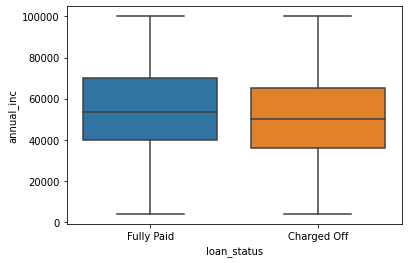

In [ ]:
# It can be seen that borrowers with low annual income are more likely to default.
# Hence, this is a strong indicator of default.

col='annual_inc'
df1=df[df[col]<outlier_vars[col]]
biContVars(df1,col)

   loan_status   mean  q_25   q_50   q_75
0  Charged Off  14.01  9.13  14.33  19.28
1   Fully Paid  13.17  8.02  13.22  18.41



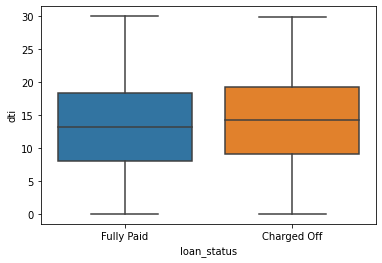

In [ ]:
# It can be seen that borrowers with high dti are more likely to default.
# Hence, this is a strong indicator of default.

col="dti"
biContVars(df,col)

   loan_status   mean   q_25   q_50   q_75
0  Charged Off  13.87  11.36  13.61  16.45
1   Fully Paid  11.64   8.59  11.49  13.99



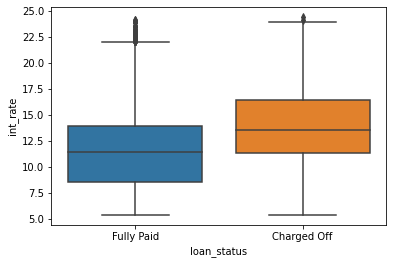

In [ ]:
# We can see that borrowers with high interest rates are more likely to default.
# Hence, this variable is a strong indicator of default.

col="int_rate"
biContVars(df,col)

   loan_status     mean    q_25    q_50     q_75
0  Charged Off   321.11  120.68  245.34   413.82
1   Fully Paid  1978.39  234.95  651.29  3056.52



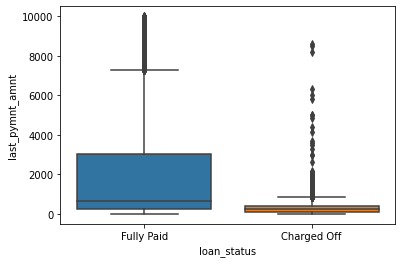

In [ ]:
# Borrowers who paid low amount as a last payments are more likely to default.
# Hence, this is a strong indicator of default.

col="last_pymnt_amnt"
df1=df[df[col]<outlier_vars[col]]
biContVars(df1,col)

   loan_status      mean  q_25   q_50   q_75
0  Charged Off  12302.80  6000  10000  17000
1   Fully Paid  10937.22  5400   9600  15000



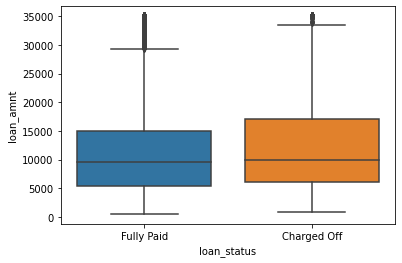

In [ ]:
# Borrowers who have high loan amount are more likely to default.
# Hence, this is a strong indicator of default.

col="loan_amnt"
biContVars(df,col)

   loan_status    mean  q_25    q_50    q_75
0  Charged Off  686.18  9.43  180.56  608.69
1   Fully Paid    0.00  0.00    0.00    0.00



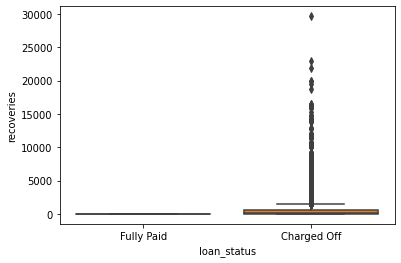

In [ ]:
# Although recoveries look like a strong indicator but it does not make sense.
# As recoveries occur only after borrower has defaulted.

col="recoveries"
biContVars(df,col)

   loan_status      mean  q_25    q_50      q_75
0  Charged Off  11899.50  3969  9061.5  16778.75
1   Fully Paid  11071.69  3487  8359.5  15695.75



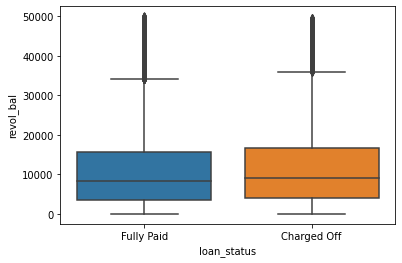

In [ ]:
# Borrowers with high revolving credit balance are more likely to default.
# Hence, this is a strong indicator of default.
 
col="revol_bal"
df1=df[df[col]<outlier_vars[col]]
biContVars(df1,col)

   loan_status   mean  q_25  q_50   q_75
0  Charged Off  55.83  34.8  58.9  79.20
1   Fully Paid  47.71  24.1  47.8  70.96



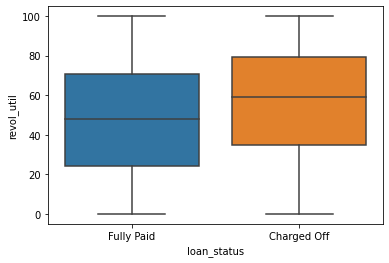

In [ ]:
# Borrowers with high revolving utilization rate are more likely to default.
# Hence, this is a strong indicator of default.

col="revol_util"
biContVars(df,col)

   loan_status   mean  q_25  q_50  q_75
0  Charged Off  21.60    13    20    29
1   Fully Paid  22.19    14    21    29



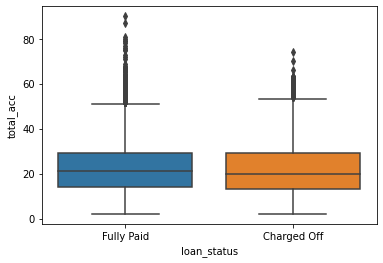

In [ ]:
# This variable does not show significant variability between Fully Paid borrowers and Defaulter.
# Hence, this variable is not a strong indicator of default.

col="total_acc"
biContVars(df,col)

   loan_status      mean     q_25      q_50      q_75
0  Charged Off   6999.93  2342.90   4985.81   9403.70
1   Fully Paid  12811.77  6205.11  10788.02  17126.86



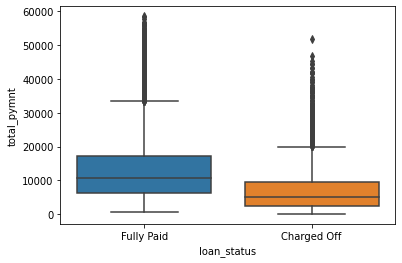

In [ ]:
# Lower total payment received from the borrower is the indicator of possible defaulter.
# Hence, this is strong indicator of default.

col="total_pymnt"
biContVars(df,col)

   loan_status  mean  q_25  q_50  q_75
0  Charged Off  4.44   0.0   0.0   0.0
1   Fully Paid  0.87   0.0   0.0   0.0



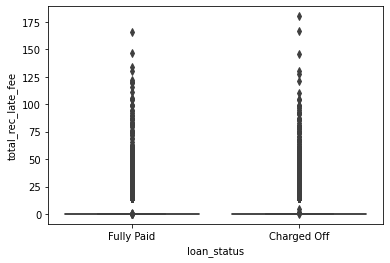

In [ ]:
# Higher late fees indicate that borrower is delinquent
# Hence, this is a strong indicator of default.

col="total_rec_late_fee"
biContVars(df,col)

# Important driver variables (i.e. variables which are strong indicators of default)

From above analysis, we identified following important driver variables:

* Categorical Variables:
1. grade
2. sub_grade
3. pub_rec_bankruptcies

* Continuous Variables:
4. annual_inc
5. dti
6. int_rate
7. last_pymnt_amnt
8. loan_amnt
9. revol_bal
10. revol_util
11. total_pymnt
12. total_rec_late_fee


